# Employee Attrition Data Analysis

1. [Preparation](#Preparation)

2. [Dataset Loading](#Dataset-Loading)

3. [Descriptive Statistics](#Descriptive-Statistics)

4. [Visualizations](#Visualizations)
    -  [4.1. Unimodel Data Visualizations](#Unimodel-Data-Visualizations)
    -  [4.2. Multimodal Data Visualizations](#Multimodal-Data-Visualizations)
    -  [4.3. Correlation Plots](#Correlation-Plots)
    
5. [Data Preparation](#Data-Preparation)
    -  [5.1. Check for missing values](#Check-for-missing-values)
    -  [5.2. Check for duplicate records](#Check-for-duplicate-records)
    -  [5.3. Check for structural errors / inconsistencies](#Check-for-structural-errors-/-inconsistencies)
    -  [5.4. Check for outliers](#Check-for-outliers)

6. [Feature Selection](#Feature-Selection)
    -  [6.1. DataSet Preparation](#DataSet-Preparation)
    -  [6.2. Univariate Selection](#Univariate-Selection)
    -  [6.3. Reduced Feature Elimination (RFE)](#Reduced-Feature-Elimination-RFE)
    -  [6.4. Model Feature Importance](#Model-Feature-Importance)
    -  [6.5. Factor Analysis](#Factor-Analysis)
    -  [6.6. Principal Component Analysis (PCA)](#Principal-Component-Analysis-PCA)

7. [Algorithm Evaluation](#Algorithm-Evaluation)

    -  [7.1 Evaluate Classification Algorithms](#Evaluate-Classification-Algorithms)
    -  [7.2 Evaluate Ensemble Methods](#Evaluate-Ensemble-Methods)
    -  [7.3 Evaluate Algorithm Performance](#Evaluate-Algorithm-Performance)
    -  [7.4 Evaluate Cross-Validation](#Evaluate-Cross-Validation)
    -  [7.5 Evaluate Feature Importances](#Evaluate-Feature-Importances)
    -  [7.6 Test Dataset Prediction Performance](#Test-Dataset-Prediction-Performance)
    -  [7.7 Model Tuning](#Model-Tuning)

## 1. Preparation <a class="anchor" id="Preparation"></a>

### 1.1 Load Libraries

In [1]:
import time

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas import set_option

import scipy
from scipy.stats import spearmanr
from scipy import interp

from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
from pandas.plotting import scatter_matrix
from matplotlib import pylab
from pylab import *
from pylab import rcParams
import seaborn as sb

from IPython.display import Markdown, display, HTML
from IPython.core.display import HTML

import sklearn
from sklearn.preprocessing import scale 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from xgboost import DMatrix
import xgboost as xgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.2 Disable auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}    

<IPython.core.display.Javascript object>

### 1.3 Set plot defaults

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
sb.set_style('whitegrid')

### 1.4 Suppress warning messages

In [4]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

## 2. Dataset Loading  <a class="anchor" id="Dataset-Loading"></a>

In [5]:
# Load dataset
df = pd.read_csv('DataSet/train.csv', sep=',')
names = list(df)
df_factors = df.iloc[:, :-1]

## 3. Descriptive Statistics <a class="anchor" id="Descriptive-Statistics"></a>

### 3.1. Check basic statistics

In [6]:
# types
print(df.dtypes)

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
Department                 object
salary                     object
Attrition                   int64
dtype: object


In [7]:
# shape
print(df.shape)

(25491, 10)


In [8]:
# head
display(HTML(df.head(3).to_html()))

### 3.2. Check descriptive statistics for numerical features

In [9]:
# descriptions
set_option('precision', 1)
df.describe(include=[np.number])

satisfaction_level  last_evaluation_rating  projects_worked_on  \
count             25491.0                 25491.0             25491.0   
mean                  6.1                     7.2                 4.2   
std                   2.5                     1.7                 1.3   
min                   0.9                     3.6                 2.0   
25%                   4.4                     5.6                 3.0   
50%                   6.5                     7.2                 4.0   
75%                   8.2                     8.7                 5.0   
max                  10.0                    10.0                 8.0   

       average_montly_hours  time_spend_company  Work_accident  \
count               25491.0             25491.0        25491.0   
mean                  205.3                 3.5            0.1   
std                    50.2                 1.5            0.4   
min                    96.0                 2.0            0.0   
25%                   160.0                 3.0            0.0   
50%                   204.0                 3.0            0.0   
75%                   249.0                 4.0            0.0   
max                   320.0                10.0            1.0   

       promotion_last_5years  Attrition  
count                2.5e+04    25491.0  
mean                 2.1e-02        0.2  
std                  1.4e-01        0.4  
min                  0.0e+00        0.0  
25%                  0.0e+00        0.0  
50%                  0.0e+00        0.0  
75%                  0.0e+00        0.0  
max                  1.0e+00        1.0

### 3.3. Check frequencies of categorical features

In [10]:
df.describe(include=[np.object])

Department salary
count       25491  25491
unique         10      3
top         sales    low
freq         6973  12403

### 3.4. Group by Department

In [11]:
df_groups = df.groupby(df['Department'])
df_groups.mean()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
Department                                                                    
IT                          6.2                     7.2                 4.2   
RandD                       6.2                     7.1                 4.3   
accounting                  5.8                     7.2                 4.2   
hr                          6.0                     7.1                 4.1   
management                  6.2                     7.2                 4.3   
marketing                   6.2                     7.2                 4.1   
product_mng                 6.2                     7.2                 4.2   
sales                       6.2                     7.1                 4.2   
support                     6.2                     7.2                 4.2   
technical                   6.1                     7.2                 4.3   

             average_montly_hours  time_spend_company  Work_accident  \
Department                                                             
IT                          206.6                 3.5            0.1   
RandD                       204.9                 3.4            0.2   
accounting                  205.7                 3.5            0.1   
hr                          203.3                 3.4            0.1   
management                  205.2                 4.3            0.2   
marketing                   204.0                 3.6            0.2   
product_mng                 203.7                 3.5            0.1   
sales                       205.0                 3.5            0.1   
support                     205.0                 3.4            0.2   
technical                   206.8                 3.4            0.1   

             promotion_last_5years  Attrition  
Department                                     
IT                         1.9e-03        0.2  
RandD                      3.4e-02        0.2  
accounting                 1.8e-02        0.3  
hr                         2.1e-02        0.3  
management                 1.1e-01        0.1  
marketing                  5.0e-02        0.2  
product_mng                0.0e+00        0.2  
sales                      2.4e-02        0.2  
support                    9.7e-03        0.2  
technical                  1.1e-02        0.3

### 3.5. Group by Salary

In [12]:
df_groups = df.groupby(df['salary'])
df_groups.mean()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
salary                                                                   
high                   6.4                     7.0                 4.2   
low                    6.0                     7.2                 4.2   
medium                 6.2                     7.2                 4.2   

        average_montly_hours  time_spend_company  Work_accident  \
salary                                                            
high                   203.8                 3.7            0.2   
low                    205.4                 3.4            0.1   
medium                 205.4                 3.5            0.1   

        promotion_last_5years  Attrition  
salary                                    
high                  6.0e-02    6.7e-02  
low                   8.4e-03    2.9e-01  
medium                2.9e-02    2.0e-01

## 4. Visualizations <a class="anchor" id="Visualizations"></a>

### 4.1. Unimodal Data Visualization <a class="anchor" id="Unimodel-Data-Visualizations"></a>

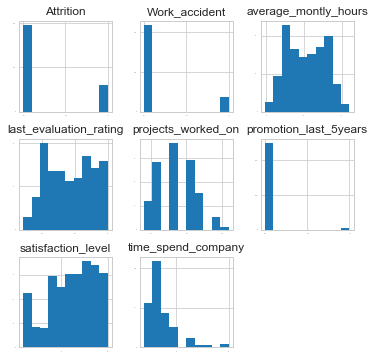

In [13]:
pyplot.rcParams['figure.figsize'] = [6, 6]
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

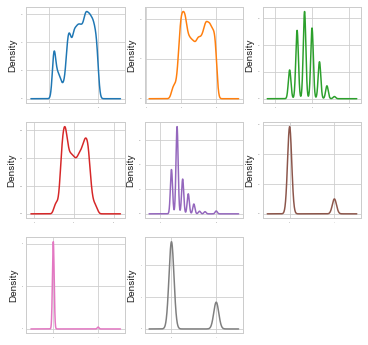

In [14]:
# density
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=1)
pyplot.show()

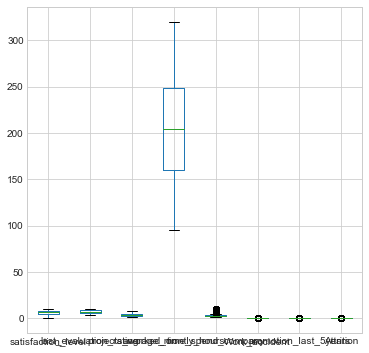

In [15]:
#box and whisker plots
df_numeric = df.select_dtypes(include=[np.number])
numeric_feature_names = list(df_numeric)

df_numeric.boxplot(return_type='dict')
plt.show()

### 4.2. Multimodal Data Visualizations <a class="anchor" id="Multimodal-Data-Visualizations"></a>

               Boxplots of numerical features against 'Attrition'               


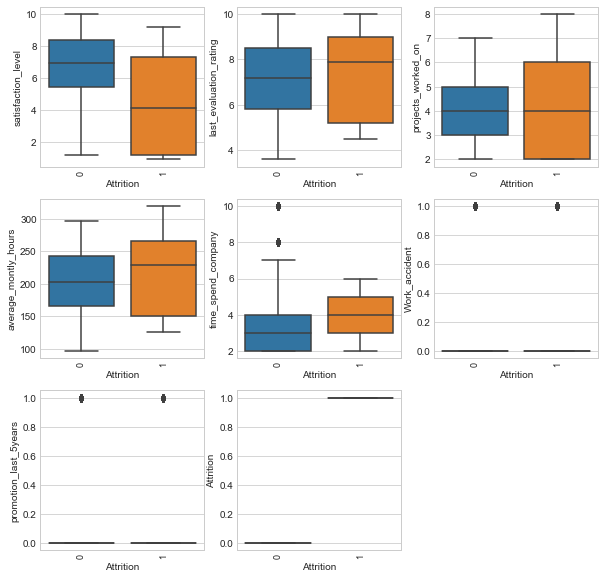

In [16]:
import seaborn as sns
import os
    
def draw_boxplot(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax = sns.boxplot(x="Attrition", y=var_name, data=df)
        ax.set_ylabel(var_name)
        plt.xticks(fontsize=9, rotation=90)
    plt.show()

print("Boxplots of numerical features against 'Attrition'".center(os.get_terminal_size().columns))

df_numeric = df.select_dtypes(include=[np.number])

for i in range(0,len(df_numeric.columns),9):
    draw_boxplot(df_numeric, df_numeric.columns[i:i+9], 3, 3)

### 4.3. Correlation Plots <a class="anchor" id="Correlation-Plots"></a>

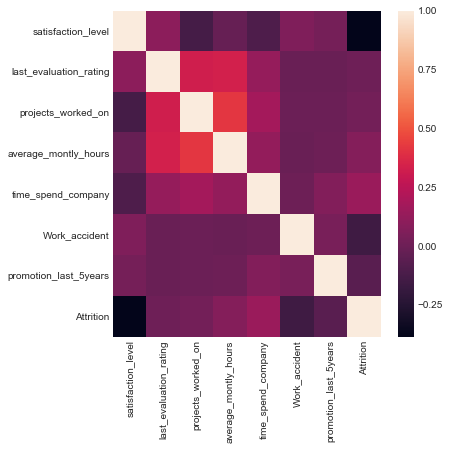

In [17]:
corr = df.corr()
sb.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Top Absolute Correlations

projects_worked_on      average_montly_hours      4.2e-01
satisfaction_level      Attrition                 3.9e-01
last_evaluation_rating  average_montly_hours      3.4e-01
                        projects_worked_on        3.3e-01
projects_worked_on      time_spend_company        1.8e-01
Work_accident           Attrition                 1.5e-01
time_spend_company      Attrition                 1.5e-01
satisfaction_level      projects_worked_on        1.3e-01
last_evaluation_rating  time_spend_company        1.3e-01
average_montly_hours    time_spend_company        1.3e-01
satisfaction_level      last_evaluation_rating    1.0e-01
                        time_spend_company        1.0e-01
average_montly_hours    Attrition                 7.5e-02
time_spend_company      promotion_last_5years     7.4e-02
promotion_last_5years   Attrition                 6.5e-02
dtype: float64



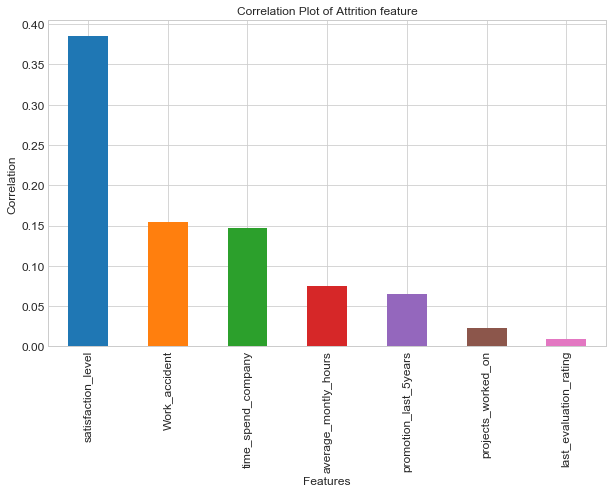

In [18]:
# correlation
#corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()
corr_matrix = df.corr().abs()
corr_matrix = corr_matrix[:-1].iloc[:,-1].sort_values(ascending=[False])

ax = corr_matrix.plot(kind='bar', title ="Correlation Plot of Attrition feature",figsize=(10,6),legend=False, fontsize=12)
ax.set_xlabel("Features",fontsize=12)
ax.set_ylabel("Correlation",fontsize=12)
    
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("Top Absolute Correlations")
print('')
print(get_top_abs_correlations(df.select_dtypes(include=[np.number]), 15))
print('')
#print("Bottom Absolute Correlations")
#print('')
#print(get_bottom_abs_correlations(df.select_dtypes(include=[np.number]), 15))

## 5. Data Preparation <a class="anchor" id="Data-Preparation"></a>

### 5.1. Check for missing values <a class="anchor" id="Check-for-missing-values"></a>

In [19]:
df.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

From the results above, no missing values are present in the dataset

### 5.2. Check for duplicate records <a class="anchor" id="Check-for-duplicate-records"></a>

In [20]:
# Check for duplicate records
df.duplicated().sum()

4530

There are 4530 records that are duplicated in the dataset. We proceed to remove these records from the dataset

In [21]:
# Drop duplicate records
df_clean = df.drop_duplicates()
print(df_clean.count())

satisfaction_level        20961
last_evaluation_rating    20961
projects_worked_on        20961
average_montly_hours      20961
time_spend_company        20961
Work_accident             20961
promotion_last_5years     20961
Department                20961
salary                    20961
Attrition                 20961
dtype: int64


After removing the 4,530 duplicate records from dataset, only 20,961 records are remaining in the dataset 

### 5.3. Check for structural errors / inconsistencies <a class="anchor" id="Check-for-structural-errors-/-inconsistencies"></a>

#### 5.3.1. Check for inconsistent values in column

In [22]:
#List unique values in the df['name'] column
for name in names:
    display(Markdown("**" + "Unique Values for column: " + name + "**"))
    print(df_clean[name].unique())

**Unique Values for column: satisfaction_level**

[ 3.8  8.   1.1  3.7  4.1  1.   9.2  8.9  4.2  8.4  7.6  8.2  4.   0.9
  4.5  8.7  5.7  4.4  3.9  8.5  3.6  8.1  9.   7.4  4.6  4.3  9.1  8.6
  7.5  3.1  8.3  7.9  3.2  7.   5.4  2.7  7.7  7.8  4.8  1.9  6.   8.8
  1.2  6.1  3.3  7.2  7.3  5.6  2.8  5.5  5.3  5.9  2.5  6.6  5.1  6.4
  2.3  1.5  1.4  3.   6.3  3.4  4.7  3.5  2.1  6.2  2.9  2.   1.7  5.
  4.9  6.8  2.2  2.6  5.8  9.9  9.8 10.   2.4  5.2  7.1  9.7  6.9  9.3
  9.4  6.7  9.6  6.5  1.3  1.8  1.6  9.5]


**Unique Values for column: last_evaluation_rating**

[ 5.3  8.6  8.8  5.2  5.   7.7  8.5 10.   8.1  9.2  5.4  8.9  8.3  5.5
  8.7  4.9  4.6  6.2  5.1  9.4  4.8  7.4  7.   9.1  9.3  9.5  5.6  9.8
  9.9  9.7  7.9  4.5  4.7  9.6  6.8  8.4  8.2  5.7  8.   7.8  9.   5.9
  7.1  6.   6.5  5.8  7.2  6.7  7.3  6.3  7.5  6.1  6.6  6.9  6.4  3.9
  4.1  4.3  4.4  7.6  3.6  4.   4.2  3.8  3.7]


**Unique Values for column: projects_worked_on**

[3 6 8 7 5 4 2]


**Unique Values for column: average_montly_hours**

[167 272 282 169 163 257 269 234 152 315 244 153 292 157 252 249 145 138
 304 155 150 256 265 136 316 279 168 137 286 192 283 158 144 142 319 236
 318 254 296 171 274 233 287 159 305 147 161 140 139 165 294 231 164 160
 277 267 154 299 170 268 273 261 226 310 148 260 302 143 293 259 255 266
 162 288 314 250 311 253 270 306 284 174 156 295 151 307 166 242 229 238
 141 235 262 280 285 308 264 202 297 149 248 243 278 241 263 276 312 281
 146 300 303 251 228 271 190 205 258 291 246 289 224 221 232 317 245 223
 239 212 301 194 214 320 247 237 298 309 227 313 206 189 215 240 275 213
 290 198 230 208 185 216 173 178 175 199 172 225 203 201 184 218 187 186
 181 188 121 114 222 116 204 219 195 211 210 217 197 220 209 182 177 132
 120 207 110 193 200 107 183 125 131 176 179 191 180 109 196 118 129 127
 124 106 108 117 111 133 126 112 135 130 122 134 113 123 115 119 128 104
 100 102  99 101  97 105  96  98 103]


**Unique Values for column: time_spend_company**

[ 3  6  4  5  2  8 10  7]


**Unique Values for column: Work_accident**

[0 1]


**Unique Values for column: promotion_last_5years**

[0 1]


**Unique Values for column: Department**

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


**Unique Values for column: salary**

['low' 'medium' 'high']


**Unique Values for column: Attrition**

[1 0]


Based on the above, no inconsistent or unusual values observed for each column in dataset

#### 5.3.2. Check no column has only 1 value

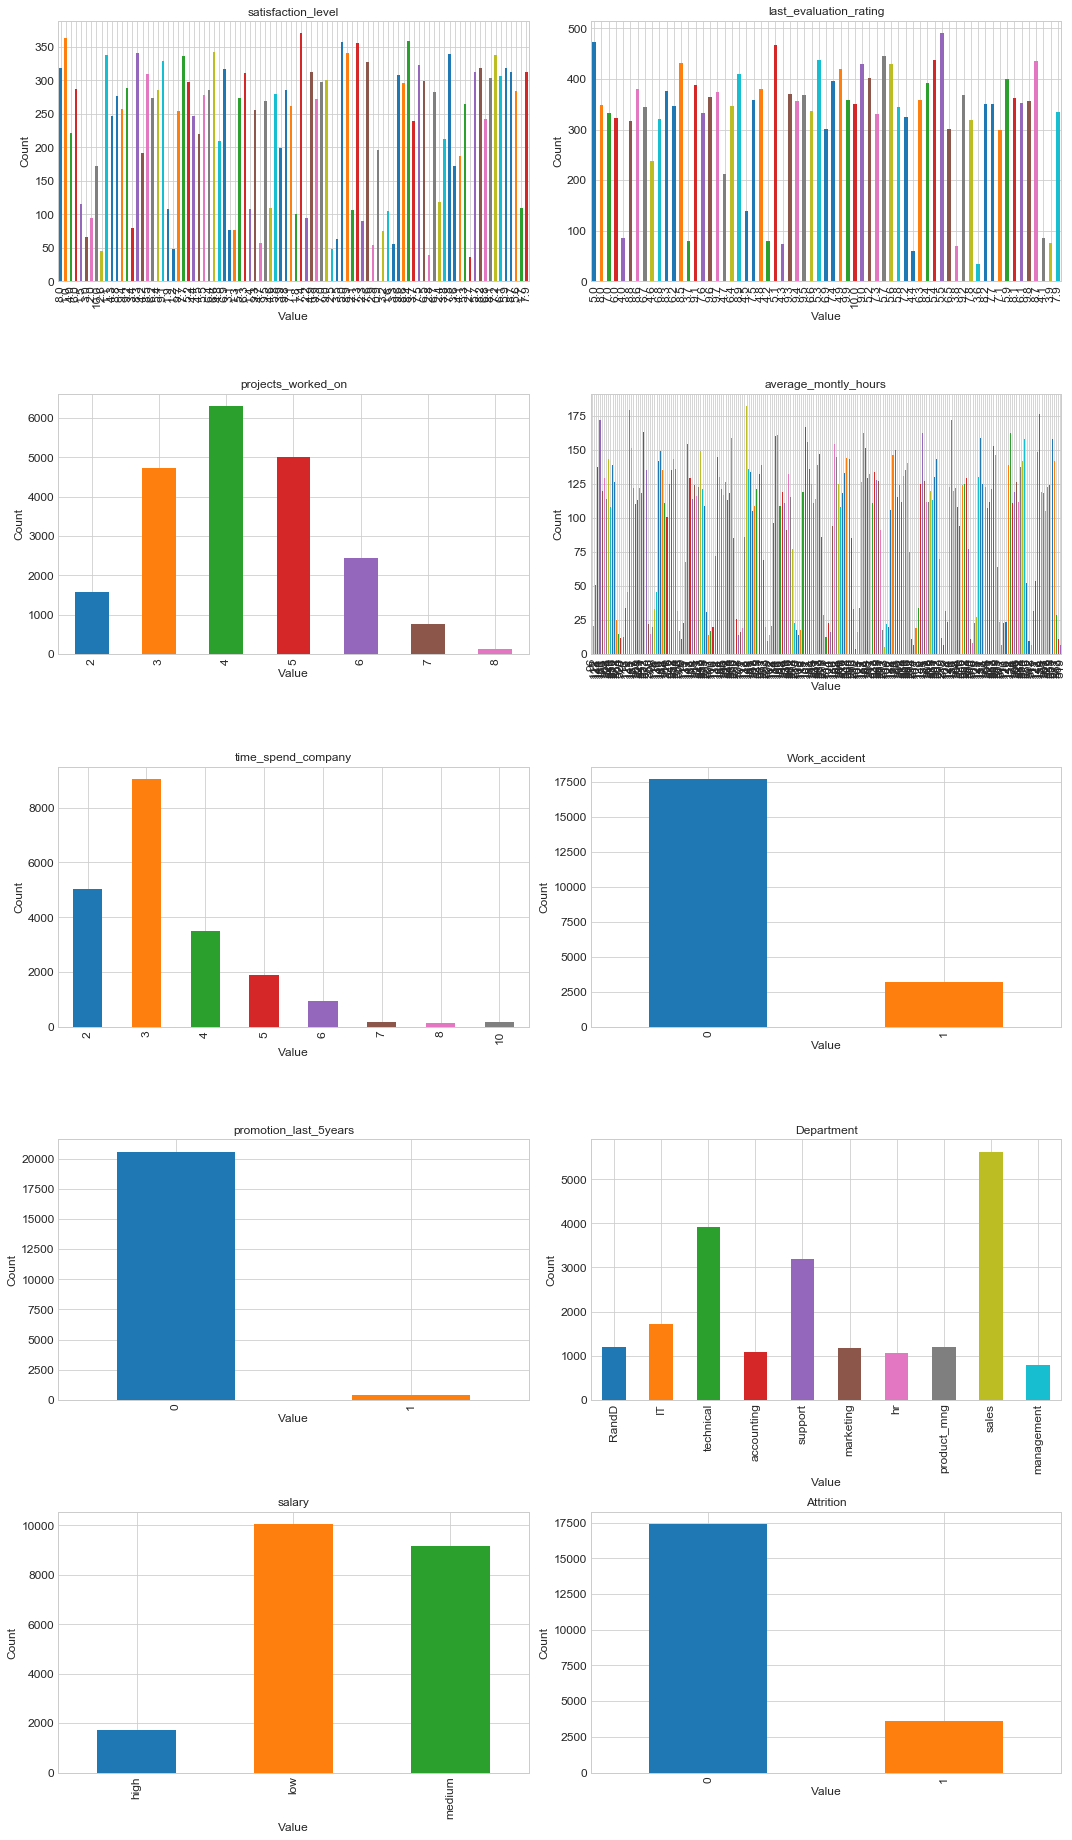

In [23]:
df_numerics = df_clean.select_dtypes(include=np.number)
names_numeric = list(df_numerics)

plt.figure(figsize=(15,30))

for i, name in enumerate(names):
    i = i + 1
    ValDist = pd.value_counts(df_clean[name].values, sort=False)
    plt.subplot(6, 2, i)
    ax = ValDist.plot(kind='bar', title =name,legend=False, fontsize=12)
    ax.set_xlabel("Value",fontsize=12)
    ax.set_ylabel("Count",fontsize=12)
plt.tight_layout()
plt.show()

Based on the above, no column consists of only 1 value

### 5.4 Check for outliers <a class="anchor" id="Check-for-outliers"></a>

In [24]:

df_numerics = df_clean.select_dtypes(include=np.number)
names_numeric = list(df_numerics)

for name in names_numeric:
    df_Outlier = df_numerics[~(np.abs(df_numerics[name]-df_numerics[name].mean())<=(8*df_numerics[name].std()))]
    if(len(df_Outlier.index) != 0):
        display(Markdown("**" + "Outlier Values for column: " + name + "**"))
        ValDist = pd.value_counts(df_Outlier[name].values, sort=False)
        ax = ValDist.plot(kind='bar', title =name,legend=False, fontsize=12)
        ax.set_xlabel("Value",fontsize=12)
        ax.set_ylabel("Count",fontsize=12)
        plt.show()
    else:
        print("No Outlier Values detected for column: " + name)

No Outlier Values detected for column: satisfaction_level
No Outlier Values detected for column: last_evaluation_rating
No Outlier Values detected for column: projects_worked_on
No Outlier Values detected for column: average_montly_hours
No Outlier Values detected for column: time_spend_company
No Outlier Values detected for column: Work_accident
No Outlier Values detected for column: promotion_last_5years
No Outlier Values detected for column: Attrition


Based on the above, no outlier values found in dataset

### 5.5 Save Cleaned Dataset <a class="anchor" id="Save-Cleaned-Dataset"></a>

In [26]:
# Save dataset
df_clean.to_csv('DataSet/train_clean.csv', index=False)

## 6. Feature Selection <a class="anchor" id="Feature-Selection"></a>

### 6.1. Dataset Preparation <a class="anchor" id="DataSet-Preparation"></a>

In [27]:
# Split out dataset

# Load dataset
df_cleaned = pd.read_csv('DataSet/train_clean.csv', sep=',')

# Create the X and y arrays
features_df = pd.get_dummies(df_cleaned.drop("Attrition", axis=1), columns=["Department", "salary"])
class_df = df_cleaned["Attrition"]

feature_labels = np.array(list(features_df))

X = features_df.as_matrix()
y = class_df.as_matrix()

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split (X, y, test_size=validation_size,
random_state=seed)
print(X_train.shape)

(16768, 20)


### 6.2. Univariate Selection <a class="anchor" id="Univariate-Selection"></a>

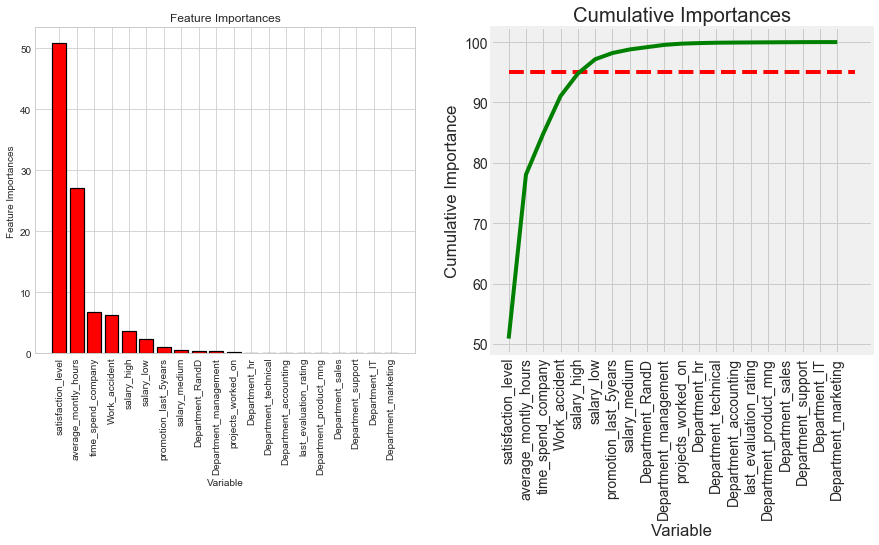

Number of features for 95% importance: 6


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def evaluateFeatureImportances_KBest(X_train, Y_train, feature_labels):
    # feature extraction
    test = SelectKBest(score_func=chi2, k=4)
    fit = test.fit(features_df, class_df)
    # summarize scores
    np.set_printoptions(precision=3)
    features = fit.transform(features_df)

    d = dict(zip(feature_labels, fit.scores_))

    from collections import OrderedDict
    from operator import itemgetter
    d_ordered = OrderedDict(sorted(d.items(), key=itemgetter(1), reverse=True))
    #print("\n".join("{}\t{}".format(k, v) for k, v in d_ordered.items()))

    feature_importances = fit.scores_
    title = 'Top 10 Features selected using Univariate Statistical Tests (Chi-squared for classification)'
    
    # Normalize the importance values 
    feature_importances2 = (feature_importances-min(feature_importances))/(max(feature_importances)-min(feature_importances))
    feature_importances3 = feature_importances2 / np.sum(feature_importances2)

    # Sort the feature labels based on the feature importance rankings from the model
    feature_index_by_importance = feature_importances3.argsort()[::-1]

    Factors = []
    FeatureImportances = []
    # Print each feature label, from most importance to least important (reverse order)
    for i, index in enumerate(feature_index_by_importance):
        #print("{} - {:2f}%".format(feature_labels[index], (importance[index] * 100.0)))
        Factors.append(feature_labels[index])
        FeatureImportances.append(feature_importances3[index] * 100.0)

    idx = [i for i, _ in enumerate(Factors)]
    
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.xlabel('Variable'); 
    plt.ylabel('Feature Importances'); 
    plt.title('Feature Importances');
    plt.style.use('fivethirtyeight')
    plt.xticks(rotation=90)
    plt.bar(idx,FeatureImportances, align='center', orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
    plt.xticks(idx, Factors)
    
    # Cumulative importances
    cumulative_importances = np.cumsum(FeatureImportances)

    plt.subplot(122)
    # Make a line graph
    plt.plot(idx, cumulative_importances, 'g-')

    # Draw line at 95% of importance retained
    plt.hlines(y = 95, xmin=0, xmax=len(FeatureImportances), color = 'r', linestyles = 'dashed')

    # Format x ticks and labels
    plt.xticks(idx, Factors, rotation = 'vertical')

    # Axis labels and title
    plt.xlabel('Variable'); 
    plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Importances');
    plt.show()
    # Find number of features for cumulative importance of 95%
    # Add 1 because Python is zero-indexed
    ImptFeatureQqty = np.where(cumulative_importances > 95)[0][0] + 1
    print('Number of features for 95% importance:', ImptFeatureQqty)
    
    return feature_index_by_importance, ImptFeatureQqty

KBest_feature_index_by_importance, KBest_Impt_Feature_Qty = evaluateFeatureImportances_KBest(X_train, Y_train, feature_labels)

### 6.3. Reduced Feature Elimination (RFE) <a class="anchor" id="Reduced-Feature-Elimination-RFE"></a>

Optimal number of features : 7


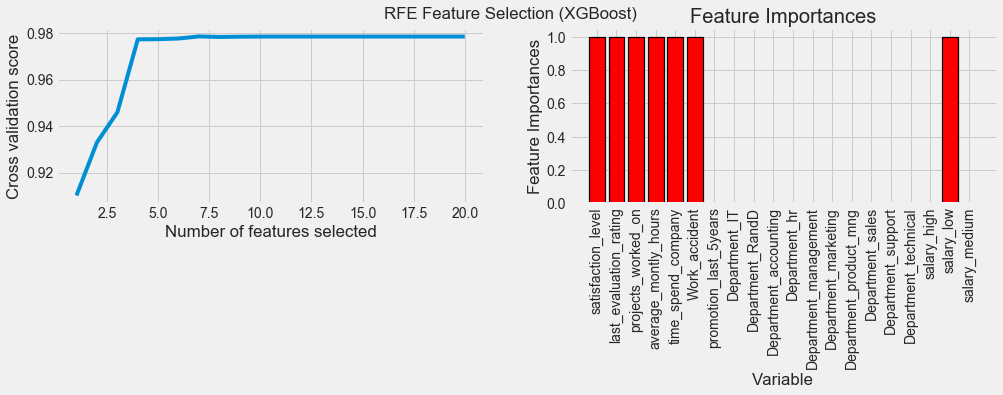

Optimal number of features : 9


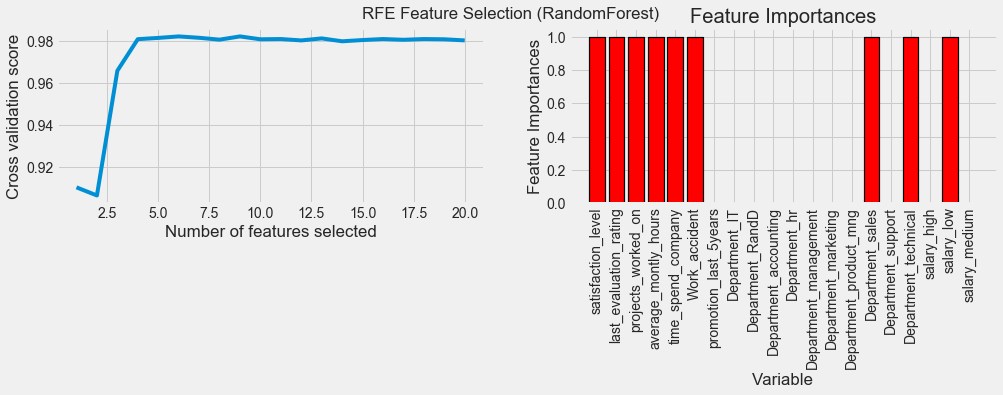

Optimal number of features : 13


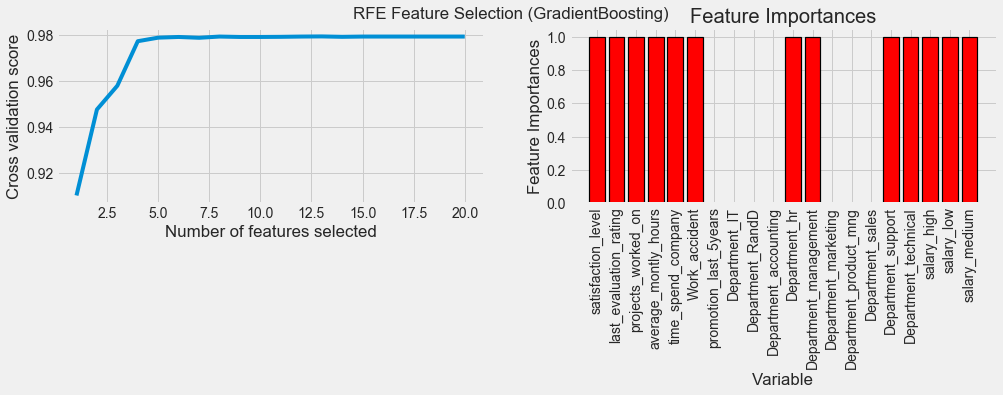

Optimal number of features : 4


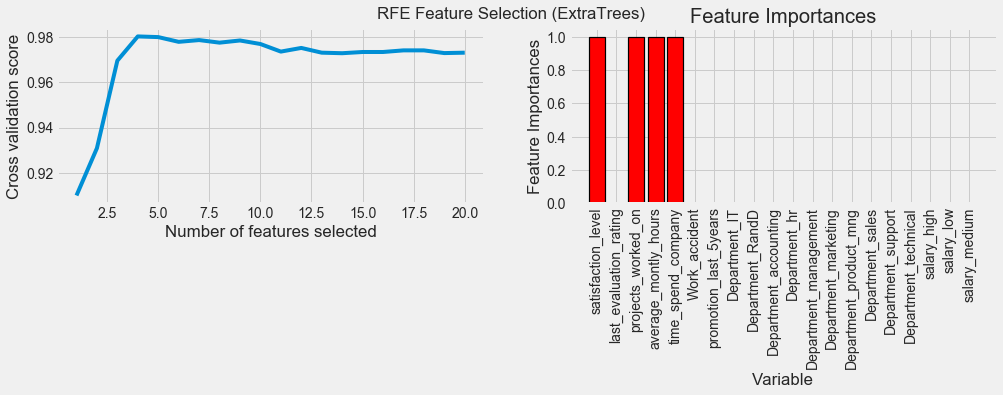

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

def evaluateFeatureImportances_RFE(title, model, X_train, Y_train, feature_labels):
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    # Create the RFE object and compute a cross-validated score.
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),
                  scoring='accuracy')
    rfecv.fit(X_train, Y_train)

    ImptFeatureQqty = rfecv.n_features_
    print("Optimal number of features : %d" % ImptFeatureQqty)
    #print(rfecv.get_support(indices=True))

    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(15,3))
    plt.suptitle(title)
    plt.subplot(121)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

    feature_index_by_importance = rfecv.get_support(indices=True)
    feature_importances = rfecv.ranking_
    feature_importances = feature_importances*1
    
    # Sort the values and flip them
    index_sorted = np.argsort(feature_importances)

    Factors = []
    FeatureImportances = [0 for x in range(len(feature_labels))]

    for i in range(0, len(feature_labels)):
        if(i in feature_index_by_importance):
            FeatureImportances[i] = feature_importances[i]
        else:
             FeatureImportances[i] = 0
        Factors.append(feature_labels[i])

    idx = [i for i, _ in enumerate(Factors)]

    plt.subplot(122)
    plt.xlabel('Variable'); 
    plt.ylabel('Feature Importances'); 
    plt.title('Feature Importances');
    plt.style.use('fivethirtyeight')
    plt.xticks(rotation=90)
    plt.bar(idx,FeatureImportances, align='center', orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
    plt.xticks(idx, Factors)
    plt.show()

    return index_sorted, ImptFeatureQqty

model = XGBClassifier(random_state=seed)
XGBClassifier_feature_index_by_importance_RFE, XGBClassifier_Impt_Feature_Qty_RFE = evaluateFeatureImportances_RFE("RFE Feature Selection (XGBoost)", model, X_train, Y_train, feature_labels)

model = RandomForestClassifier(random_state=seed)
RFClassifier_feature_index_by_importance_RFE, RFClassifier_Impt_Feature_Qty_RFE = evaluateFeatureImportances_RFE("RFE Feature Selection (RandomForest)", model, X_train, Y_train, feature_labels)

model = GradientBoostingClassifier(random_state=seed)
GBClassifier_feature_index_by_importance_RFE, GBClassifier_Impt_Feature_Qty_RFE = evaluateFeatureImportances_RFE("RFE Feature Selection (GradientBoosting)", model, X_train, Y_train, feature_labels)

model = ExtraTreesClassifier(random_state=seed)
ETClassifier_feature_index_by_importance_RFE, ETClassifier_Impt_Feature_Qty_RFE = evaluateFeatureImportances_RFE("RFE Feature Selection (ExtraTrees)", model, X_train, Y_train, feature_labels)

### 6.4. Model Feature Importance <a class="anchor" id="Model-Feature-Importance"></a>

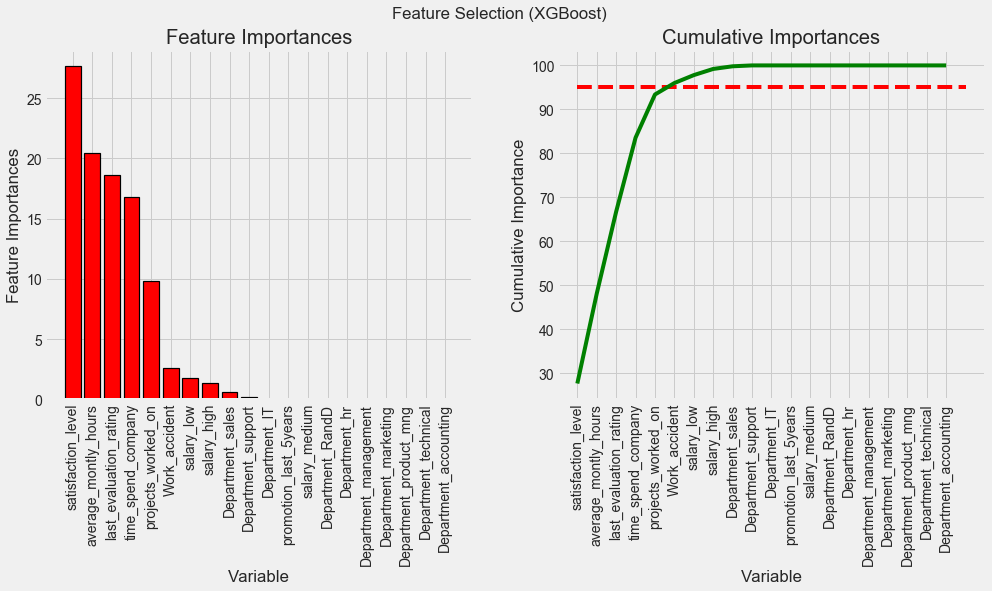

Number of features for 95% importance: 6


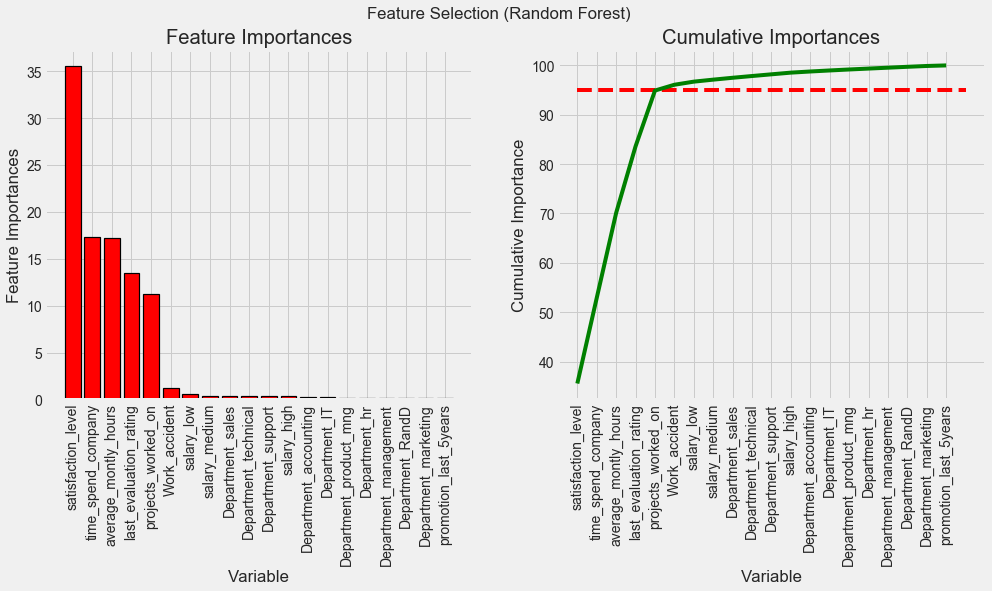

Number of features for 95% importance: 6


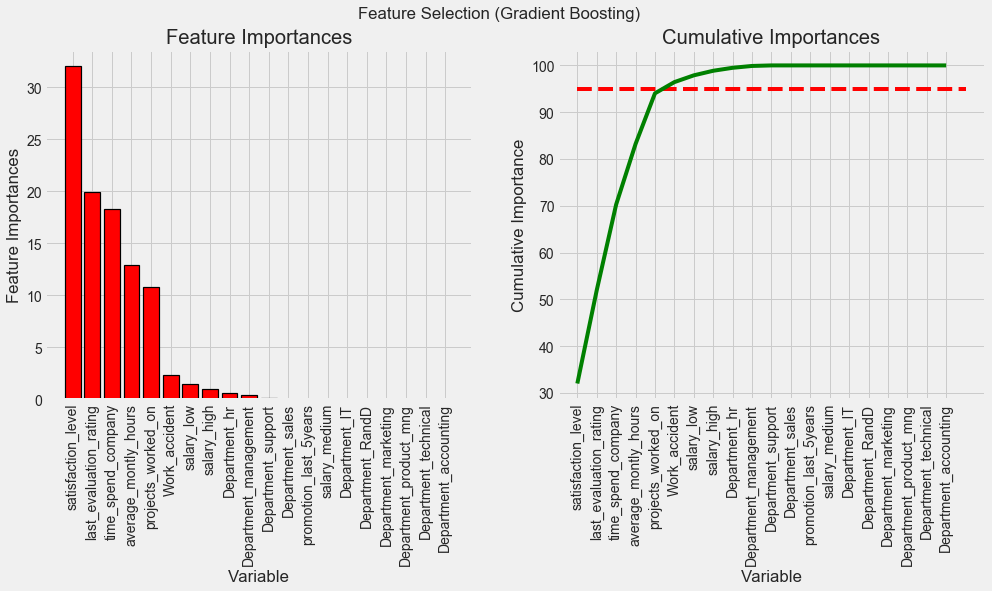

Number of features for 95% importance: 6


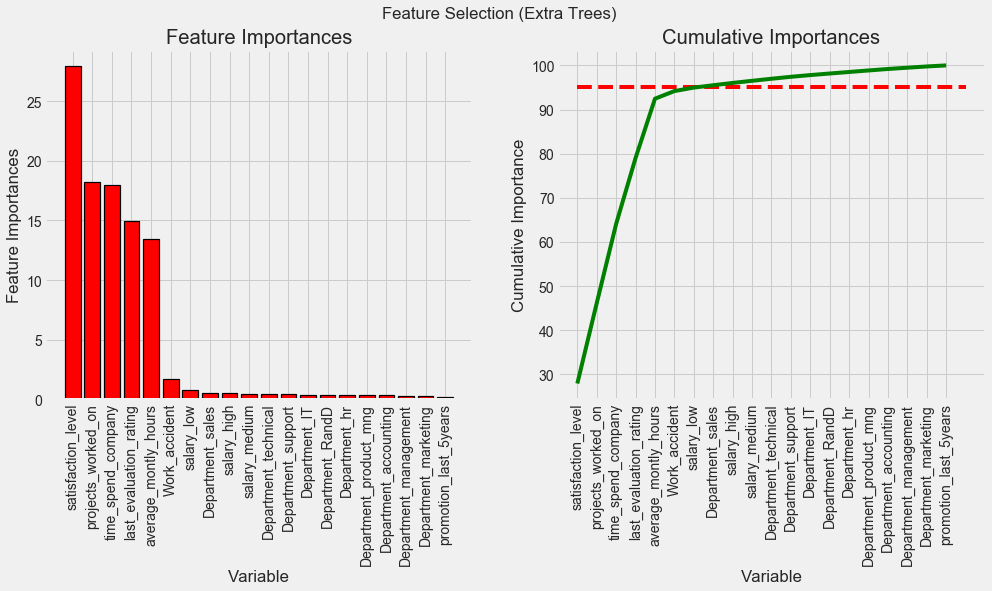

Number of features for 95% importance: 8


In [30]:
def evaluateFeatureImportances(title, model, X_train, Y_train):
    model.fit(X_train, Y_train)

    # Create a numpy array based on the model's feature importances
    importance = model.feature_importances_
    # Sort the feature labels based on the feature importance rankings from the model
    feature_index_by_importance = importance.argsort()[::-1]

    Factors = []
    FeatureImportances = []
    # Print each feature label, from most importance to least important (reverse order)
    for i, index in enumerate(feature_index_by_importance):
        #print("{} - {:2f}%".format(feature_labels[index], (importance[index] * 100.0)))
        Factors.append(feature_labels[index])
        FeatureImportances.append(importance[index] * 100.0)

    idx = [i for i, _ in enumerate(Factors)]
    
    plt.figure(figsize=(15,6))
    plt.suptitle(title)
    plt.subplot(121)
    # Axis labels and title
    plt.xlabel('Variable'); 
    plt.ylabel('Feature Importances'); 
    plt.title('Feature Importances');
    plt.style.use('fivethirtyeight')
    plt.xticks(rotation=90)
    plt.bar(idx,FeatureImportances, align='center', orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
    plt.xticks(idx, Factors)
    
    # Cumulative importances
    cumulative_importances = np.cumsum(FeatureImportances)

    plt.subplot(122)
    # Make a line graph
    plt.plot(idx, cumulative_importances, 'g-')

    # Draw line at 95% of importance retained
    plt.hlines(y = 95, xmin=0, xmax=len(FeatureImportances), color = 'r', linestyles = 'dashed')

    # Format x ticks and labels
    plt.xticks(idx, Factors, rotation = 'vertical')

    # Axis labels and title
    plt.xlabel('Variable'); 
    plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Importances');
    plt.show()
    # Find number of features for cumulative importance of 95%
    # Add 1 because Python is zero-indexed
    ImptFeatureQqty = np.where(cumulative_importances > 95)[0][0] + 1
    print('Number of features for 95% importance:', ImptFeatureQqty)
    #print(feature_index_by_importance)
    return feature_index_by_importance, ImptFeatureQqty

model = XGBClassifier(random_state=seed)
XGBClassifier_feature_index_by_importance, XGBClassifier_Impt_Feature_Qty = evaluateFeatureImportances(
                                                                    "Feature Selection (XGBoost)", model, X_train, Y_train)

model = RandomForestClassifier(random_state=seed)
RFClassifier_feature_index_by_importance, RFClassifier_Impt_Feature_Qty = evaluateFeatureImportances(
                                                                    "Feature Selection (Random Forest)", model, X_train, Y_train)

model = GradientBoostingClassifier(random_state=seed)
GBClassifier_feature_index_by_importance, GBClassifier_Impt_Feature_Qty = evaluateFeatureImportances(
                                                                    "Feature Selection (Gradient Boosting)", model, X_train, Y_train)

model = ExtraTreesClassifier(random_state=seed)
ETClassifier_feature_index_by_importance, ETClassifier_Impt_Feature_Qty = evaluateFeatureImportances(
                                                                    "Feature Selection (Extra Trees)", model, X_train, Y_train)

### 6.5. Factor Analysis <a class="anchor" id="Factor-Analysis"></a>

In [31]:
feature_names = list(features_df)

pd.options.display.float_format = '{:.4f}'.format

factor = FactorAnalysis(n_components=20, random_state=101).fit(features_df)

df_factor = pd.DataFrame(factor.components_, columns=feature_names)

display(HTML(df_factor.to_html()))

ImptFeatureQty = len(df_factor.loc[~(df_factor==0).all(axis=1)])

print("Number of important features: ", ImptFeatureQty)
    

Number of important features:  15


In the test on the Employee Attrition dataset, for example, the resulting factors should be a maximum of 15, because only 15 factors have significant connections with the original features. These factors can be used as new variables because they reflect an unseen but important feature that the previously available data only hinted at.

### 6.6. Principal Component Analysis (PCA) <a class="anchor" id="Principal-Component-Analysis-PCA"></a>

In [32]:
num_components = 20
pca = decomposition.PCA(n_components=num_components)

EA_pca = pca.fit(features_df)
EA_pca.explained_variance_ratio_.sum()

0.9999999999999998

In [33]:
# summarize components
print("Explained Variance Ratio: %s" %EA_pca.explained_variance_ratio_)

#Dump components relations with features:
df_pca = pd.DataFrame(EA_pca.components_,columns=features_df.columns, index = [str(X) for X in range(num_components)])
display(HTML(df_pca.to_html()))

Explained Variance Ratio: [9.945e-01 2.464e-03 1.143e-03 7.115e-04 5.056e-04 1.886e-04 9.679e-05
 6.970e-05 5.388e-05 4.857e-05 4.536e-05 3.056e-05 2.350e-05 2.328e-05
 2.196e-05 2.095e-05 1.547e-05 6.994e-06 4.250e-36 1.331e-36]


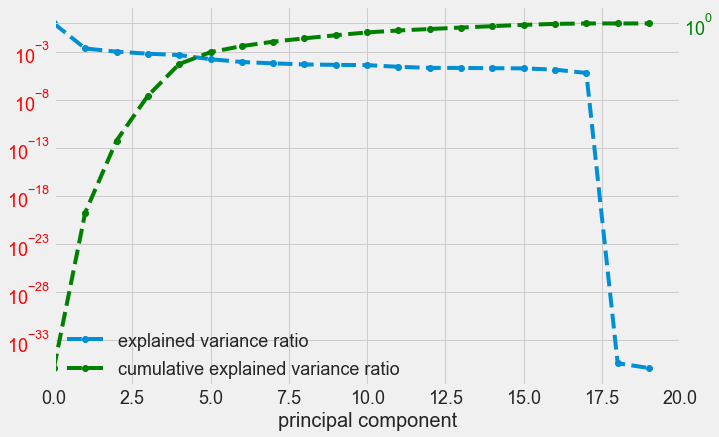

In [34]:
fig, ax1 = plt.subplots(figsize = (10,6.5))
ax1.semilogy(EA_pca.explained_variance_ratio_, '--o', label = 'explained variance ratio');
color =  ax1.lines[0].get_color()
ax1.set_xlabel('principal component', fontsize = 20);
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    
plt.legend(loc=(0.01, 0.075) ,fontsize = 18);

ax2 = ax1.twinx()
ax2.semilogy(EA_pca.explained_variance_ratio_.cumsum(), '--go', label = 'cumulative explained variance ratio');
for tl in ax2.get_yticklabels():
    tl.set_color('g')

ax1.tick_params(axis='both', which='major', labelsize=18);
ax1.tick_params(axis='both', which='minor', labelsize=12);
ax2.tick_params(axis='both', which='major', labelsize=18);
ax2.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 20]);
plt.legend(loc=(0.01, 0),fontsize = 18);

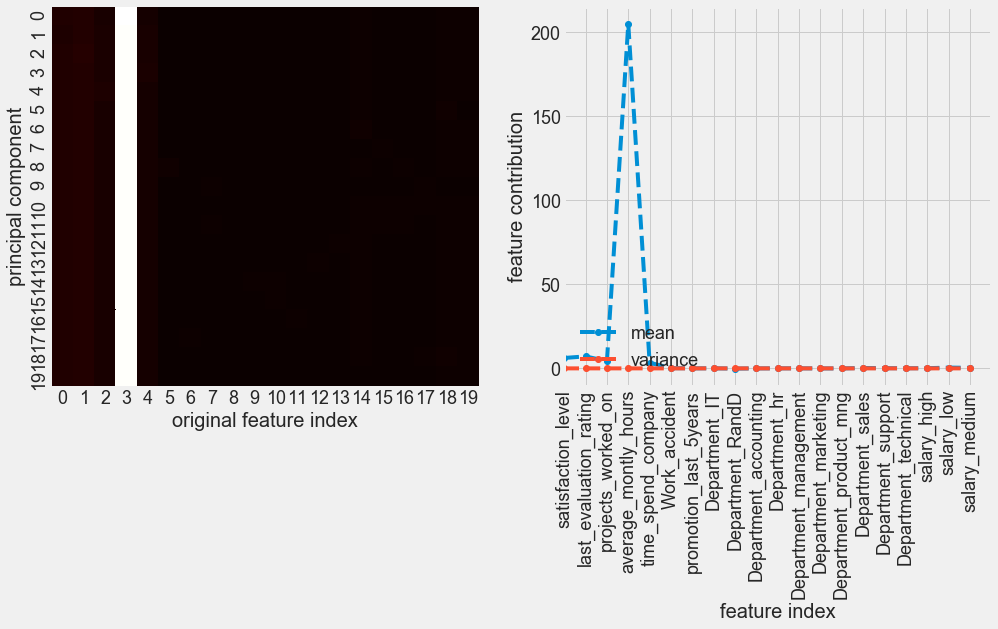

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_inv_data = EA_pca.inverse_transform(np.eye(num_components))

fig = plt.figure(figsize=(15, 6.5))
plt.subplot(121)
sns.heatmap(EA_pca.inverse_transform(np.eye(num_components)), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

x = [i for i in range(len(features_df.columns))]
plt.subplot(122)
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 20])
plt.xticks(x, features_df.columns, rotation='vertical')
plt.legend(loc='lower left', fontsize=18)
plt.show()

In this decomposition of the Employee Attrition dataset, the vector array provided by explained_variance_ratio_ indicates that most of the information is concentrated into 1 component. It’s therefore possible to reduce the entire dataset to just one component, providing a reduction of noise and redundant information from the original dataset.

## 7. Algorithm Evaluation <a class="anchor" id="Algorithm-Evaluation"></a>

### 7.1. Evaluate Classification Algorithms <a class="anchor" id="Evaluate-Classification-Algorithms"></a>

In [36]:
# Evaluate Classification Algorithms

params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
pyplot.rcParams.update(params)

def evaluate_algos(classifiers, X_train, Y_train, X_validation, Y_validation):
    score_list = []

    for i, (name, algo) in enumerate(classifiers.items()):
        model = algo
        start_time = time.time()
        model.fit(X_train, Y_train)

        # make predictions for test data
        y_pred = model.predict(X_validation)
        end_time = time.time()
        run_time = end_time - start_time

        predictions = [round(value) for value in y_pred]

        # evaluate predictions
        accuracy = accuracy_score(Y_validation, predictions)
        roc_auc = roc_auc_score(Y_validation, predictions)
        cm = confusion_matrix(Y_validation, predictions)
        cr = classification_report(Y_validation, predictions, target_names=["Employee","Left"])
        tn, fp, fn, tp = cm.ravel()
        #print("%s: Time(%.2fs), Accuracy(%.2f%%), ROC_AUC(%.2f)" % (name, run_time, accuracy * 100.0, roc_auc))
    
        # Compute ROC curve and ROC area for each class
        y_predict_probabilities = model.predict_proba(X_validation)[:,1]

        fpr, tpr, _ = roc_curve(Y_validation, y_predict_probabilities)
        ROC_AUC = auc(fpr, tpr)
        
        precision, recall, _r = precision_recall_curve(Y_validation, y_predict_probabilities)
        pr_score = average_precision_score(Y_validation, y_predict_probabilities)

        score_list.append([name, run_time, accuracy * 100.0, roc_auc, cm, cr, tp, fp, tn, fn, fpr, tpr, ROC_AUC, precision, recall, pr_score])
    return score_list

def plot_scores(score_list):      
    score_list.sort(key=lambda x: -x[2])
    names = list([item[0] for item in score_list])
    timings = list([item[1] for item in score_list])
    accuracies = list([item[2] for item in score_list])
    roc_aucs = list([item[3] for item in score_list])
    cms = list([item[4] for item in score_list])
    crs = list([item[5] for item in score_list])
    TPs = list([item[6] for item in score_list])
    FPs = list([item[7] for item in score_list])    
    TNs = list([item[8] for item in score_list])
    FNs = list([item[9] for item in score_list])  
    fpr = list([item[10] for item in score_list])  
    tpr = list([item[11] for item in score_list])  
    ROC_AUC = list([item[12] for item in score_list]) 
    precision = list([item[13] for item in score_list])  
    recall = list([item[14] for item in score_list])  
    pr_scores = list([item[15] for item in score_list]) 
    #PltBar = [TPs, FPs, TNs, FNs]
    PltBar = [FPs, FNs]
    idx = [i for i, _ in enumerate(names)]

    pyplot.rcParams['figure.figsize'] = [15, 6]
    plt.subplot(1,3,1)
    plt.title("Accuracy")
    plt.bar(idx,accuracies, color = 'b', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.subplot(1,3,2)
    plt.title("ROC_AUC")
    plt.bar(idx,roc_aucs, color = 'g', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.subplot(1,3,3)
    plt.title("timings")
    plt.bar(idx,timings, color = 'g', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.show()
    
    df = pd.DataFrame(PltBar,
                     #index=['True Positive', 'False Positive', 'True Negative', 'False Negative'],
                    index=['False Positive', 'False Negative'],
                     columns=pd.Index(names, 
                     name='Algorithm')).round(2)

    df.plot(kind='bar',figsize=(15,6))

    ax = plt.gca()
    pos = []
    for bar in ax.patches:
        pos.append(bar.get_x()+bar.get_width()/2.)

    ax.set_xticks(pos,minor=True)
    lab = []
    for i in range(len(pos)):
        l = df.columns.values[i//len(df.index.values)]
        lab.append(l)

    ax.set_xticklabels(lab,minor=True, rotation=90, size=12)
    ax.tick_params(axis='x', which='major', pad=90, size=0)
    ax.legend(loc='upper right', frameon=False)
    plt.setp(ax.get_xticklabels(), rotation=0)
    plt.show()

    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plot_ROC_curve(fpr, tpr, ROC_AUC, names)
    plt.subplot(122)
    plot_PrecisionRecall_curve(precision, recall, pr_scores, names)
    plt.show()
    
def plot_ROC_curve(fpr, tpr, ROC_AUC, names):
    for i, roc in enumerate(ROC_AUC):
        plt.plot(fpr[i], tpr[i], color = (0, i / 20.0, 0, 1),
            lw=2, label='ROC curve (area = %0.2f) for %s' % (ROC_AUC[i], names[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

def plot_PrecisionRecall_curve(precision, recall, pr_scores, names):
    for i, roc in enumerate(pr_scores):
        plt.plot(precision[i], recall[i], color = (0, i / 20.0, 0, 1),
            lw=2, label='PR curve (area = %0.2f) for %s' % (pr_scores[i], names[i]))
    #plt.plot([1, 0], [1, 0], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve')
    plt.legend(loc="lower right")
    
def plot_confusion_matrix(cm, output_labels, title):
    pylab.clf()
    normed_cm = normalize(cm, axis=1, norm='l1')
    pylab.matshow(normed_cm, fignum=False, cmap="Blues", vmin=0, vmax=1.0)
    ax = pylab.axes()
    ax.set_xticks(range(len(output_labels)))
    ax.set_xticklabels(output_labels)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(output_labels)))
    ax.set_yticklabels(output_labels)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel("Predicted Class")
    pylab.ylabel("True Class")
    pylab.grid(False)
    pylab.show()
    
def print_scores(score_list, title):
    score_list.sort(key=lambda x: -x[2])
    names = list([item[0] for item in score_list])
    timings = list([item[1] for item in score_list])
    accuracies = list([item[2] for item in score_list])
    roc_aucs = list([item[3] for item in score_list])
    cms = list([item[4] for item in score_list])
    crs = list([item[5] for item in score_list])
    TPs = list([item[6] for item in score_list])
    FPs = list([item[7] for item in score_list])    
    TNs = list([item[8] for item in score_list])
    FNs = list([item[9] for item in score_list])    
    
    display(Markdown("**" + "Name: " + title + "**"))
    print("Accuracy on Validation Dataset: %.2f%%" % (accuracies[0]))
    print("Timing on Validation Dataset: %.2fs" % (timings[0]))
    plot_confusion_matrix(cms[0], ["Employee", "Left Company"], "Confusion Matrix of " + names[0])
    print(crs[0])

    #tn, fp, fn, tp = cms[0].ravel()
    print("True Positives: %i" % TPs[0])
    print("False Positives: %i" % FPs[0])
    print("True Negatives: %i" % TNs[0])
    print("False Negatives: %i" % FNs[0])
    print("")

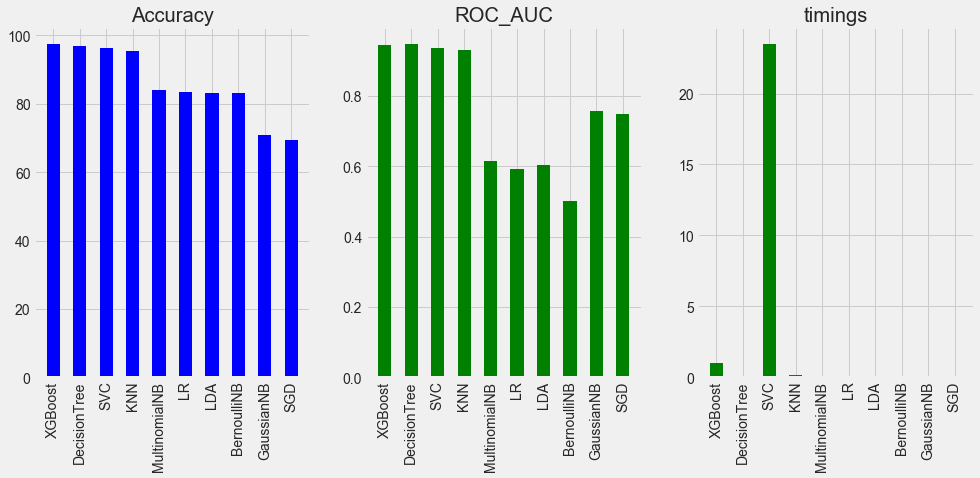

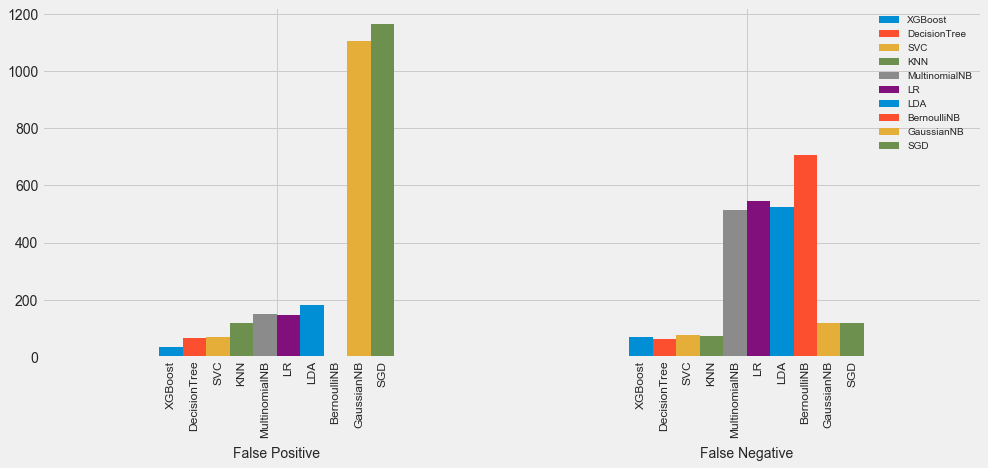

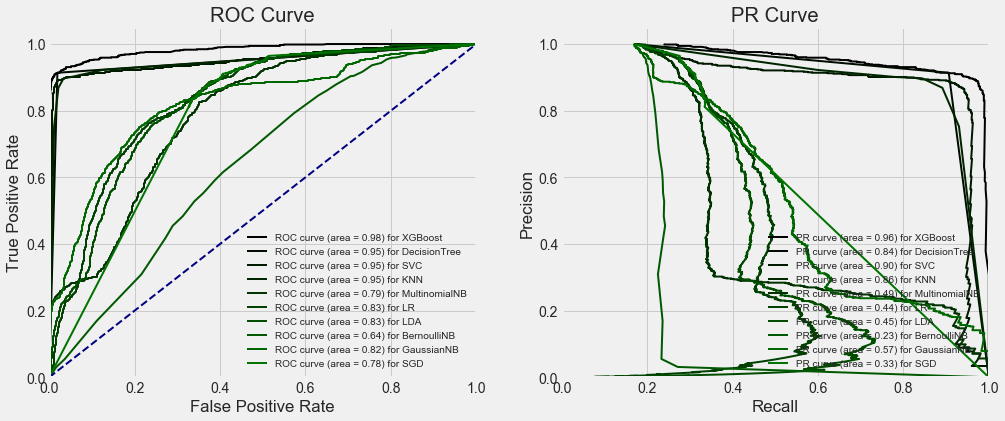

In [37]:
# Evaluate Classification Algorithms
classifiers = {'LR' : LogisticRegression(random_state=seed),
           'LDA' : LinearDiscriminantAnalysis(), 
           'SVC' : SVC(probability=True, random_state=seed),
           'KNN' : KNeighborsClassifier(),
           'GaussianNB' : GaussianNB(),
           'BernoulliNB' : BernoulliNB(),
           'MultinomialNB' : MultinomialNB(),
           'DecisionTree' :  DecisionTreeClassifier(random_state=seed),
           'SGD' :  SGDClassifier(loss='log', random_state=seed),
           'XGBoost' :  XGBClassifier(random_state=seed),               
          }

scores_classifiers = evaluate_algos(classifiers, X_train, Y_train, X_validation, Y_validation)
plot_scores(scores_classifiers)

### 7.2. Evaluate Ensemble Methods <a class="anchor" id="Evaluate-Ensemble-Methods"></a>

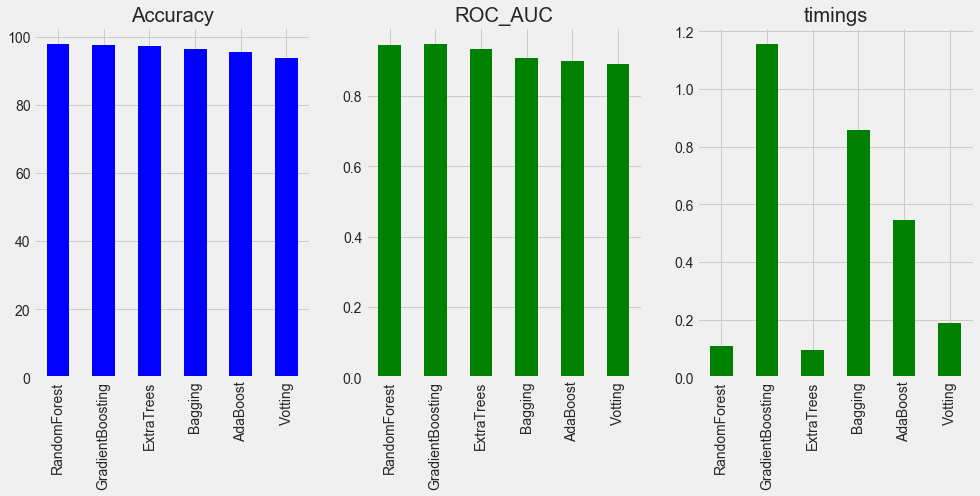

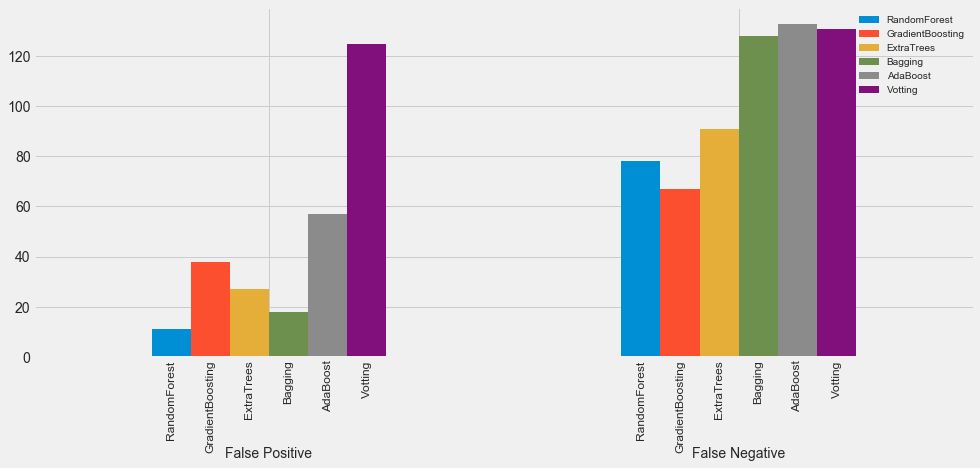

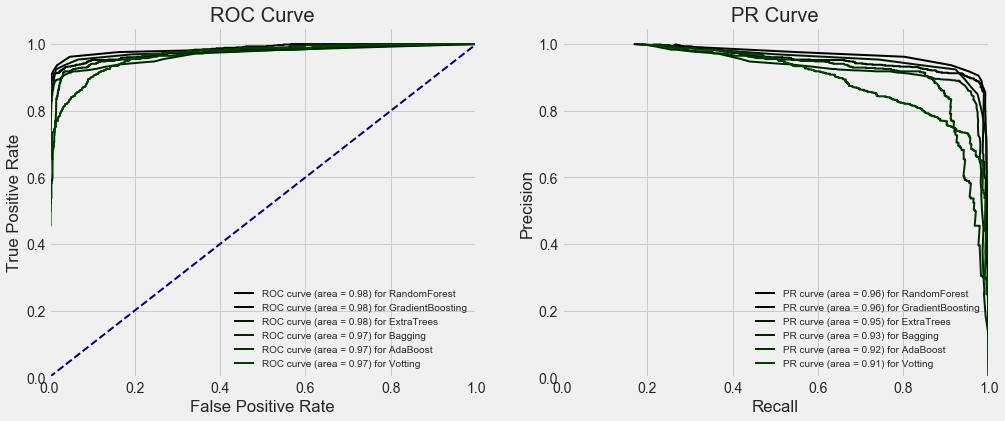

In [38]:
# Evaluate Ensemble Methods
clf1 = LogisticRegression(random_state=seed)
clf2 = RandomForestClassifier(random_state=seed)
clf3 = GaussianNB()

ensemble_classifiers = {'AdaBoost' : AdaBoostClassifier(random_state=seed),
           'GradientBoosting' : GradientBoostingClassifier(random_state=seed), 
           'RandomForest' : RandomForestClassifier(random_state=seed),
           'ExtraTrees' : ExtraTreesClassifier(random_state=seed),
           'Bagging' : BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5, random_state=seed),
           'Votting' : VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')               
          }

scores_ensembles = evaluate_algos(ensemble_classifiers, X_train, Y_train, X_validation, Y_validation)
plot_scores(scores_ensembles)

### 7.3. Evaluate Algorithm Performance <a class="anchor" id="Evaluate-Algorithm-Performance"></a>

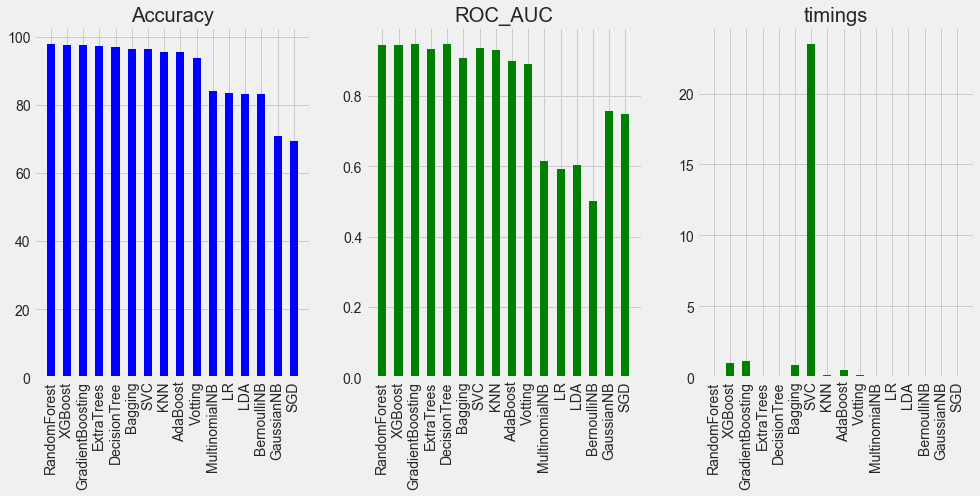

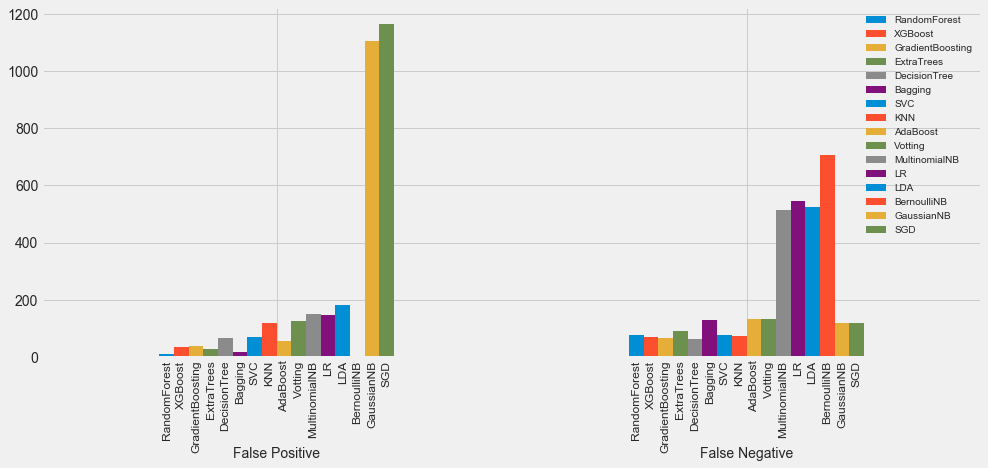

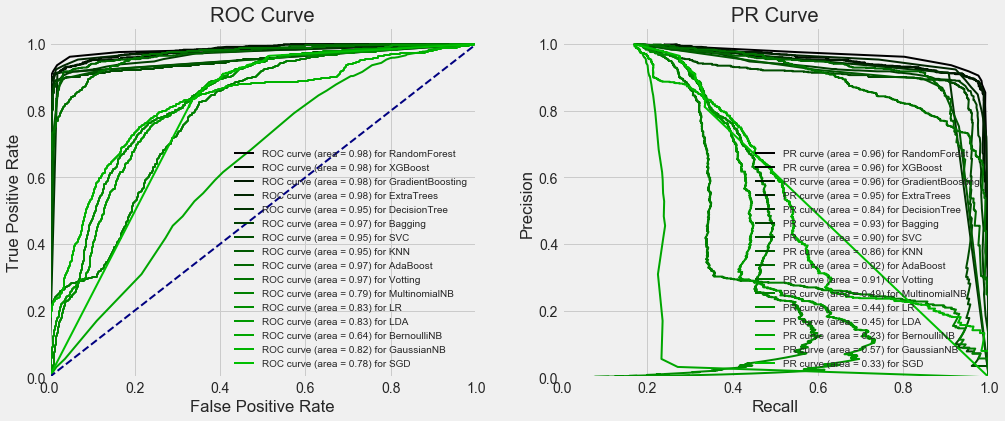

In [39]:
score_lists = scores_classifiers + scores_ensembles
plot_scores(score_lists)

### 7.4. Evaluate Cross-Validation <a class="anchor" id="Evaluate-Cross-Validation"></a>


LR: Time(0.75s), Mean(82.91%), STDEV(0.47%)
LDA: Time(0.29s), Mean(82.64%), STDEV(0.42%)
SVC: Time(173.61s), Mean(96.78%), STDEV(0.42%)
KNN: Time(0.72s), Mean(95.60%), STDEV(0.44%)
GaussianNB: Time(0.11s), Mean(70.01%), STDEV(1.41%)
BernoulliNB: Time(0.10s), Mean(82.78%), STDEV(0.76%)
MultinomialNB: Time(0.08s), Mean(83.27%), STDEV(0.58%)
DecisionTree: Time(0.59s), Mean(97.44%), STDEV(0.22%)
SGD: Time(0.19s), Mean(80.88%), STDEV(3.31%)
XGBoost: Time(8.15s), Mean(97.93%), STDEV(0.26%)


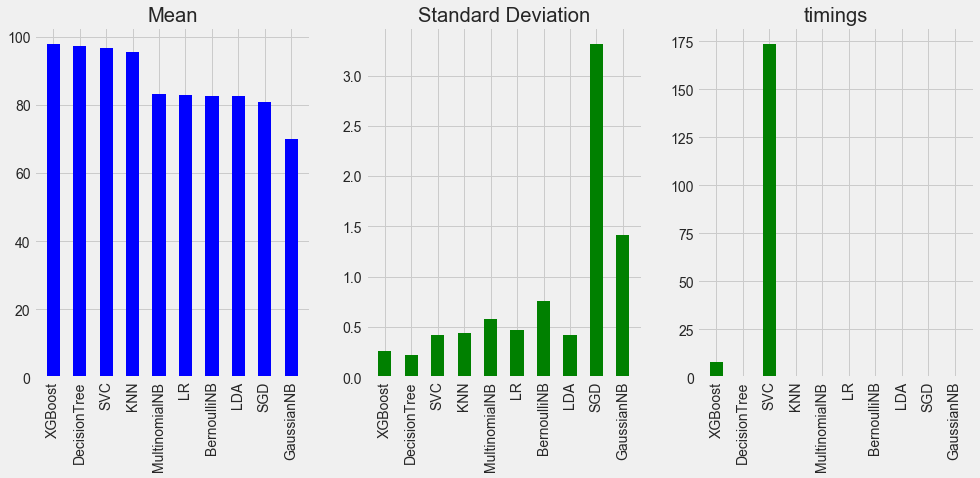

AdaBoost: Time(4.14s), Mean(95.52%), STDEV(0.52%)
GradientBoosting: Time(9.81s), Mean(98.03%), STDEV(0.28%)
RandomForest: Time(0.98s), Mean(98.15%), STDEV(0.34%)
ExtraTrees: Time(1.00s), Mean(97.83%), STDEV(0.27%)
Bagging: Time(3.79s), Mean(96.62%), STDEV(0.35%)
Votting: Time(1.82s), Mean(93.44%), STDEV(0.63%)


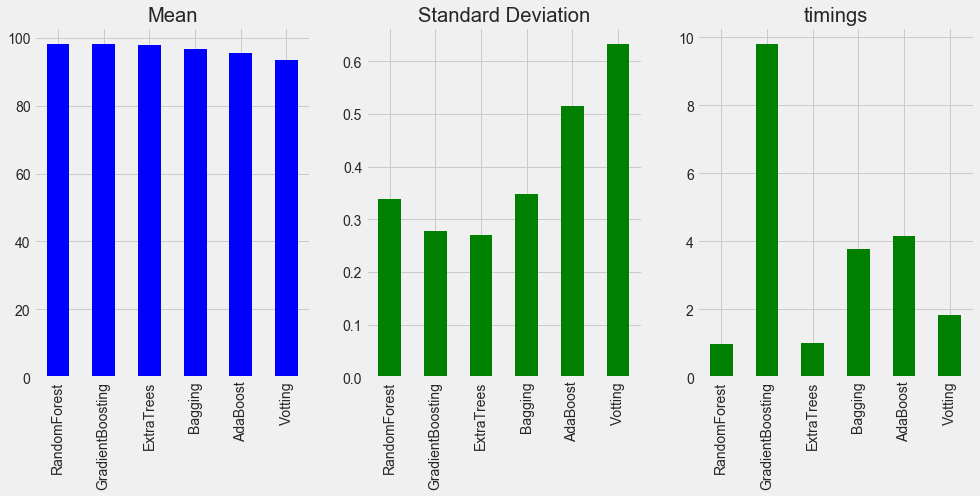

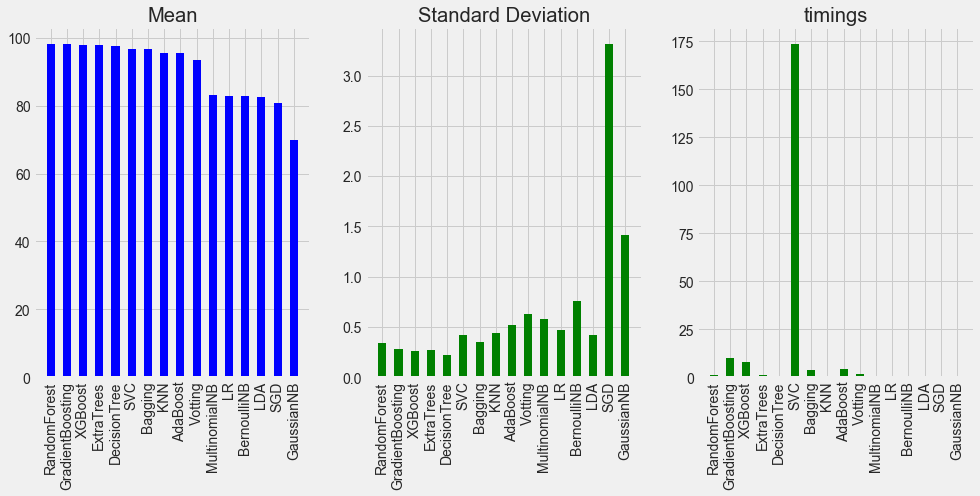

In [40]:
# Evaluate Cross-Validation
def evaluate_algos_cv(classifiers, X_train, Y_train):
    # Test options and evaluation metric
    num_folds = 10
    seed = 7
    scoring = 'accuracy'
    
    score_list = []

    for i, (name, algo) in enumerate(classifiers.items()):
        model = algo
        start_time = time.time()
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        run_time = end_time - start_time
        msg = "%s: Time(%.2fs), Mean(%.2f%%), STDEV(%.2f%%)" % (name, run_time, cv_results.mean() * 100, cv_results.std() * 100)
        print(msg)
        score_list.append([name, run_time, cv_results.mean() * 100, cv_results.std() * 100])
    
    return score_list
        
def plot_scores_cv(score_list):      
    score_list.sort(key=lambda x: -x[2])
    names = list([item[0] for item in score_list])
    timings = list([item[1] for item in score_list])
    means = list([item[2] for item in score_list])
    stds = list([item[3] for item in score_list])
    idx = [i for i, _ in enumerate(names)]

    pyplot.rcParams['figure.figsize'] = [15, 6]
    plt.subplot(1,3,1)
    plt.title("Mean")
    plt.bar(idx,means, color = 'b', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.subplot(1,3,2)
    plt.title("Standard Deviation")
    plt.bar(idx,stds, color = 'g', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.subplot(1,3,3)
    plt.title("timings")
    plt.bar(idx,timings, color = 'g', width = 0.5)
    plt.xticks(idx, names, rotation=90)
    plt.show()

def print_scores_cv(score_list, title):
    score_list.sort(key=lambda x: -x[2])
    names = list([item[0] for item in score_list])
    timings = list([item[1] for item in score_list])
    means = list([item[2] for item in score_list])
    stds = list([item[3] for item in score_list])
    
    print("Name: %s" % name)
    print("Algorithm: %s" % names[0])
    print("Mean on Training Dataset: %.2f%%" % (means[0]))
    print("Standard Deviation on Training Dataset: %.2f%%" % (stds[0]))
    print("Timing on Training Dataset: %.2fs" % (timings[0]))
    
scores_classifiers_cv = evaluate_algos_cv(classifiers, X_train, Y_train)
plot_scores_cv(scores_classifiers_cv)
scores_ensembles_cv = evaluate_algos_cv(ensemble_classifiers, X_train, Y_train)
plot_scores_cv(scores_ensembles_cv)
score_lists_cv = scores_classifiers_cv + scores_ensembles_cv
plot_scores_cv(score_lists_cv)

### 7.5. Evaluate Feature Importances <a class="anchor" id="Evaluate-Feature-Importances"></a>

#### 7.5.1. Limit Number of Features 

We will now reduce the number of features in use by the model to only those required to account for 95% of the importance. 
The same number of features must be used in the training and testing sets.

##### 7.5.1.1. Correlation Identified Features

In [41]:
# Create training and testing sets with only the important features
important_indices = [feature_labels.tolist().index('satisfaction_level'), feature_labels.tolist().index('Work_accident'),
                    feature_labels.tolist().index('time_spend_company')]

train_corr_features = X_train[:, important_indices]
test_corr_features = X_validation[:, important_indices]

print('Correlation Identified train features shape:', train_corr_features.shape)
print('Correlation Identified test features shape:', test_corr_features.shape)

Correlation Identified train features shape: (16768, 3)
Correlation Identified test features shape: (4193, 3)


##### 7.5.1.2. Univariate Selection Features 

In [42]:
KBest_train_features = X_train[:, KBest_feature_index_by_importance[0:KBest_Impt_Feature_Qty]]
KBest_test_features = X_validation[:, KBest_feature_index_by_importance[0:KBest_Impt_Feature_Qty]]

print('KBest train features shape:', KBest_train_features.shape)
print('KBest test features shape:', KBest_test_features.shape)

KBest train features shape: (16768, 6)
KBest test features shape: (4193, 6)


##### 7.5.1.3 Model Feature Importances

###### 7.5.1.3.1. XG Boost Classifier

In [43]:
XGBClassifier_train_features = X_train[:, XGBClassifier_feature_index_by_importance[0:XGBClassifier_Impt_Feature_Qty]]
XGBClassifier_test_features = X_validation[:, XGBClassifier_feature_index_by_importance[0:XGBClassifier_Impt_Feature_Qty]]

print('Important XGBClassifier train features shape:', XGBClassifier_train_features.shape)
print('Important XGBClassifier test features shape:', XGBClassifier_test_features.shape)

Important XGBClassifier train features shape: (16768, 6)
Important XGBClassifier test features shape: (4193, 6)


###### 7.5.1.3.2. Random Forest Classifier

In [44]:
RFClassifier_train_features = X_train[:, RFClassifier_feature_index_by_importance[0:RFClassifier_Impt_Feature_Qty]]
RFClassifier_test_features = X_validation[:, RFClassifier_feature_index_by_importance[0:RFClassifier_Impt_Feature_Qty]]

print('Important RFClassifier train features shape:', RFClassifier_train_features.shape)
print('Important RFClassifier test features shape:', RFClassifier_test_features.shape)

Important RFClassifier train features shape: (16768, 6)
Important RFClassifier test features shape: (4193, 6)


###### 7.5.1.3.3. Gradient Boosting Classifier

In [45]:
GBClassifier_train_features = X_train[:, GBClassifier_feature_index_by_importance[0:GBClassifier_Impt_Feature_Qty]]
GBClassifier_test_features = X_validation[:, GBClassifier_feature_index_by_importance[0:GBClassifier_Impt_Feature_Qty]]

print('Important GBClassifier train features shape:', GBClassifier_train_features.shape)
print('Important GBClassifier test features shape:', GBClassifier_test_features.shape)

Important GBClassifier train features shape: (16768, 6)
Important GBClassifier test features shape: (4193, 6)


###### 7.5.1.3.4. Extra Trees Classifier

In [46]:
ETClassifier_train_features = X_train[:, ETClassifier_feature_index_by_importance[0:ETClassifier_Impt_Feature_Qty]]
ETClassifier_test_features = X_validation[:, ETClassifier_feature_index_by_importance[0:ETClassifier_Impt_Feature_Qty]]

print('Important ETClassifier train features shape:', ETClassifier_train_features.shape)
print('Important ETClassifier test features shape:', ETClassifier_test_features.shape)

Important ETClassifier train features shape: (16768, 8)
Important ETClassifier test features shape: (4193, 8)


##### 7.5.1.4. RFE

###### 7.5.1.4.1. XG Boost Classifier

In [47]:
XGBClassifier_RFE_train_features = X_train[:, XGBClassifier_feature_index_by_importance_RFE[0:XGBClassifier_Impt_Feature_Qty_RFE]]
XGBClassifier_RFE_test_features = X_validation[:, XGBClassifier_feature_index_by_importance_RFE[0:XGBClassifier_Impt_Feature_Qty_RFE]]

print('Important XGBClassifier RFE train features shape:', XGBClassifier_RFE_train_features.shape)
print('Important XGBClassifier RFE test features shape:', XGBClassifier_RFE_test_features.shape)

Important XGBClassifier RFE train features shape: (16768, 7)
Important XGBClassifier RFE test features shape: (4193, 7)


###### 7.5.1.4.2. Random Forest Classifier

In [48]:
RFClassifier_RFE_train_features = X_train[:, RFClassifier_feature_index_by_importance_RFE[0:RFClassifier_Impt_Feature_Qty_RFE]]
RFClassifier_RFE_test_features = X_validation[:, RFClassifier_feature_index_by_importance_RFE[0:RFClassifier_Impt_Feature_Qty_RFE]]

print('Important RFClassifier RFE train features shape:', RFClassifier_RFE_train_features.shape)
print('Important RFClassifier RFE test features shape:', RFClassifier_RFE_test_features.shape)

Important RFClassifier RFE train features shape: (16768, 9)
Important RFClassifier RFE test features shape: (4193, 9)


###### 7.5.1.4.3. Gradient Boosting Classifier

In [49]:
GBClassifier_RFE_train_features = X_train[:, GBClassifier_feature_index_by_importance_RFE[0:GBClassifier_Impt_Feature_Qty_RFE]]
GBClassifier_RFE_test_features = X_validation[:, GBClassifier_feature_index_by_importance_RFE[0:GBClassifier_Impt_Feature_Qty_RFE]]

print('Important GBClassifier RFE train features shape:', GBClassifier_RFE_train_features.shape)
print('Important GBClassifier RFE test features shape:', GBClassifier_RFE_test_features.shape)

Important GBClassifier RFE train features shape: (16768, 13)
Important GBClassifier RFE test features shape: (4193, 13)


###### 7.5.1.4.4. Extra Trees Classifier

In [50]:
ETClassifier_RFE_train_features = X_train[:, ETClassifier_feature_index_by_importance_RFE[0:ETClassifier_Impt_Feature_Qty_RFE]]
ETClassifier_RFE_test_features = X_validation[:, ETClassifier_feature_index_by_importance_RFE[0:ETClassifier_Impt_Feature_Qty_RFE]]

print('Important ETClassifier RFE train features shape:', ETClassifier_train_features.shape)
print('Important ETClassifier RFE test features shape:', ETClassifier_test_features.shape)

Important ETClassifier RFE train features shape: (16768, 8)
Important ETClassifier RFE test features shape: (4193, 8)


#### 7.5.2. Model Evaluation on Feature Categories

For each of the 5 feature categories identified (All, Correlation-identified, Univariate Selection, Model Feature Importance, RFE), we perform evaluation on the selected classifiers i.e. XG Boost, Random Forest, Gradient Boosting, Extra Trees.

##### 7.5.2.1. XG Boost Classifier

**Name: XGBoost (All)**

Accuracy on Validation Dataset: 97.50%
Timing on Validation Dataset: 0.91s


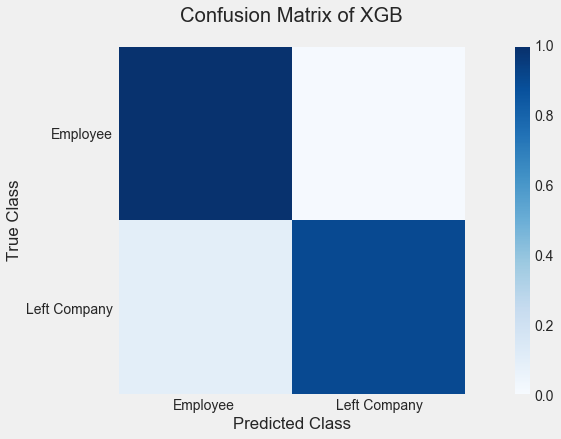

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.99      3485
       Left       0.95      0.90      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 638
False Positives: 35
True Negatives: 3450
False Negatives: 70



**Name: XGBoost (correlation identified)**

Accuracy on Validation Dataset: 95.13%
Timing on Validation Dataset: 0.31s


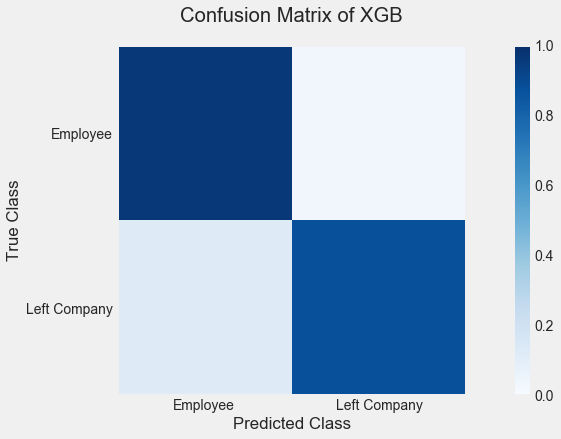

             precision    recall  f1-score   support

   Employee       0.98      0.97      0.97      3485
       Left       0.84      0.88      0.86       708

avg / total       0.95      0.95      0.95      4193

True Positives: 622
False Positives: 118
True Negatives: 3367
False Negatives: 86



**Name: XGBoost (KBest)**

Accuracy on Validation Dataset: 96.76%
Timing on Validation Dataset: 0.41s


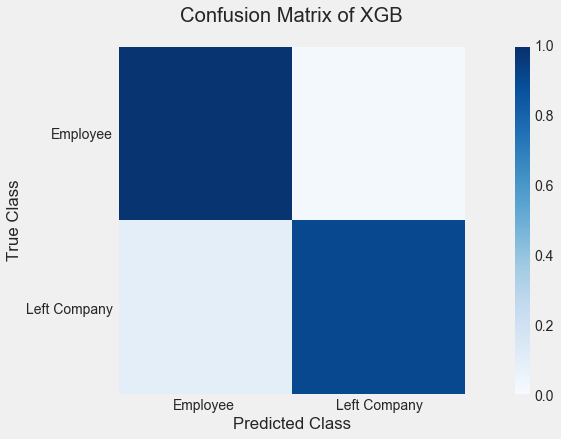

             precision    recall  f1-score   support

   Employee       0.98      0.98      0.98      3485
       Left       0.91      0.90      0.90       708

avg / total       0.97      0.97      0.97      4193

True Positives: 639
False Positives: 67
True Negatives: 3418
False Negatives: 69



**Name: XGBoost (Model)**

Accuracy on Validation Dataset: 97.42%
Timing on Validation Dataset: 0.42s


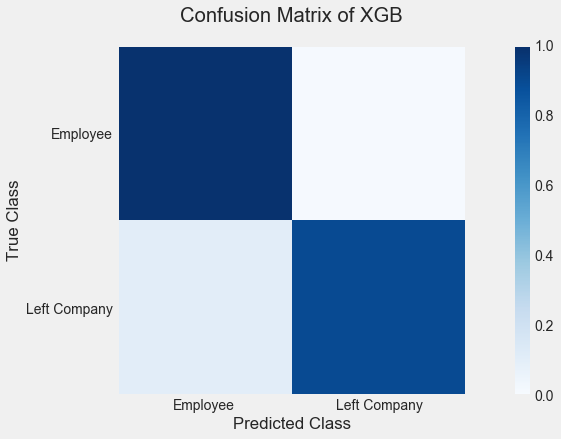

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.98      3485
       Left       0.95      0.90      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 636
False Positives: 36
True Negatives: 3449
False Negatives: 72



**Name: XGBoost (RFE)**

Accuracy on Validation Dataset: 97.38%
Timing on Validation Dataset: 0.46s


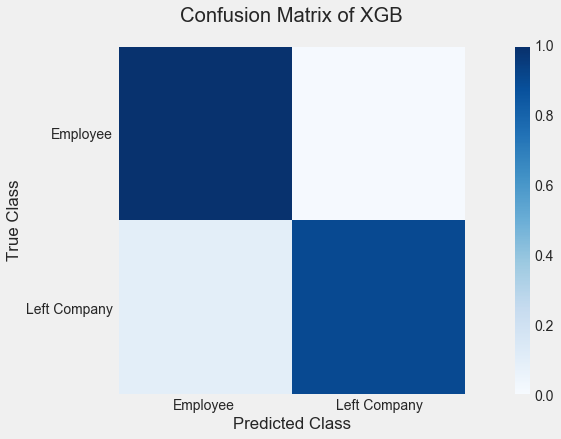

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.98      3485
       Left       0.94      0.90      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 638
False Positives: 40
True Negatives: 3445
False Negatives: 70



In [51]:
classifier_XGB = {'XGB' : XGBClassifier(random_state=seed)}

# Train the model on all features
XGBClassifier_scores_all_features = evaluate_algos(classifier_XGB, X_train, Y_train, X_validation, Y_validation)

# Train the XGBClassifier model on correlation identified features
XGBClassifier_scores_corr_features = evaluate_algos(classifier_XGB, train_corr_features, Y_train, test_corr_features, Y_validation)

# Train the XGBClassifier model on Univariate Selection features
XGBClassifier_scores_KBest_features = evaluate_algos(classifier_XGB, KBest_train_features, Y_train, KBest_test_features, Y_validation)

# Train the model on only the XGBClassifier Model features
XGBClassifier_scores_impt_features = evaluate_algos(classifier_XGB, XGBClassifier_train_features, Y_train, XGBClassifier_test_features, Y_validation)

# Train the model on only the XGBClassifier RFE features
XGBClassifier_scores_impt_features_RFE = evaluate_algos(classifier_XGB, XGBClassifier_RFE_train_features, Y_train, XGBClassifier_RFE_test_features, Y_validation)

print_scores(XGBClassifier_scores_all_features, "XGBoost (All)")
print_scores(XGBClassifier_scores_corr_features, "XGBoost (correlation identified)")
print_scores(XGBClassifier_scores_KBest_features, "XGBoost (KBest)")
print_scores(XGBClassifier_scores_impt_features, "XGBoost (Model)")
print_scores(XGBClassifier_scores_impt_features_RFE, "XGBoost (RFE)")

##### 7.5.2.2. Random Forest Classifier

**Name: Random Forest (All)**

Accuracy on Validation Dataset: 97.88%
Timing on Validation Dataset: 0.13s


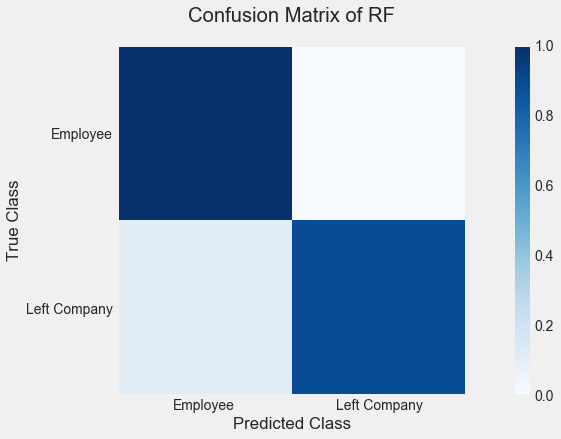

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3485
       Left       0.98      0.89      0.93       708

avg / total       0.98      0.98      0.98      4193

True Positives: 630
False Positives: 11
True Negatives: 3474
False Negatives: 78



**Name: Random Forest (correlation identified)**

Accuracy on Validation Dataset: 95.30%
Timing on Validation Dataset: 0.05s


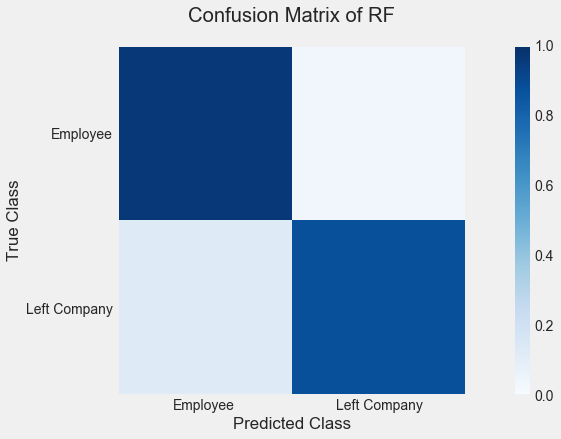

             precision    recall  f1-score   support

   Employee       0.98      0.97      0.97      3485
       Left       0.85      0.88      0.86       708

avg / total       0.95      0.95      0.95      4193

True Positives: 622
False Positives: 111
True Negatives: 3374
False Negatives: 86



**Name: Random Forest (KBest)**

Accuracy on Validation Dataset: 96.57%
Timing on Validation Dataset: 0.09s


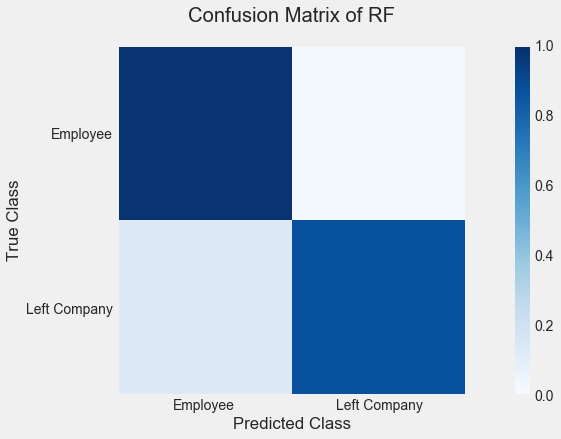

             precision    recall  f1-score   support

   Employee       0.97      0.98      0.98      3485
       Left       0.92      0.87      0.90       708

avg / total       0.97      0.97      0.97      4193

True Positives: 619
False Positives: 55
True Negatives: 3430
False Negatives: 89



**Name: Random Forest (Model)**

Accuracy on Validation Dataset: 97.90%
Timing on Validation Dataset: 0.09s


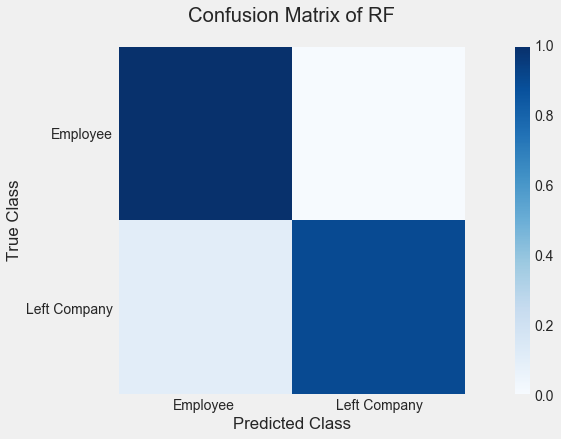

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3485
       Left       0.98      0.90      0.94       708

avg / total       0.98      0.98      0.98      4193

True Positives: 635
False Positives: 15
True Negatives: 3470
False Negatives: 73



**Name: Random Forest (RFE)**

Accuracy on Validation Dataset: 98.00%
Timing on Validation Dataset: 0.11s


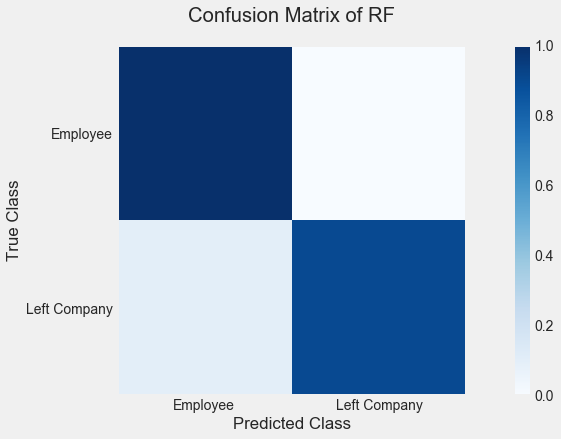

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3485
       Left       0.98      0.90      0.94       708

avg / total       0.98      0.98      0.98      4193

True Positives: 637
False Positives: 13
True Negatives: 3472
False Negatives: 71



In [52]:
classifier_RF = {'RF' : RandomForestClassifier(random_state=seed)}

# Train the model on all features
RFClassifier_scores_all_features = evaluate_algos(classifier_RF, X_train, Y_train, X_validation, Y_validation)

# Train the RFClassifier model on correlation identified features
RFClassifier_scores_corr_features = evaluate_algos(classifier_RF, train_corr_features, Y_train, test_corr_features, Y_validation)

# Train the RFClassifier model on Univariate Selection features
RFClassifier_scores_KBest_features = evaluate_algos(classifier_RF, KBest_train_features, Y_train, KBest_test_features, Y_validation)

# Train the model on only the XGBClassifier Model features
RFClassifier_scores_impt_features = evaluate_algos(classifier_RF, RFClassifier_train_features, Y_train, RFClassifier_test_features, Y_validation)

# Train the model on only the XGBClassifier RFE features
RFClassifier_scores_impt_features_RFE = evaluate_algos(classifier_RF, RFClassifier_RFE_train_features, Y_train, RFClassifier_RFE_test_features, Y_validation)

print_scores(RFClassifier_scores_all_features, "Random Forest (All)")
print_scores(RFClassifier_scores_corr_features, "Random Forest (correlation identified)")
print_scores(RFClassifier_scores_KBest_features, "Random Forest (KBest)")
print_scores(RFClassifier_scores_impt_features, "Random Forest (Model)")
print_scores(RFClassifier_scores_impt_features_RFE, "Random Forest (RFE)")

##### 7.5.2.3. Gradient Boosting Classifier

**Name: Gradient Boosting (All)**

Accuracy on Validation Dataset: 97.50%
Timing on Validation Dataset: 1.34s


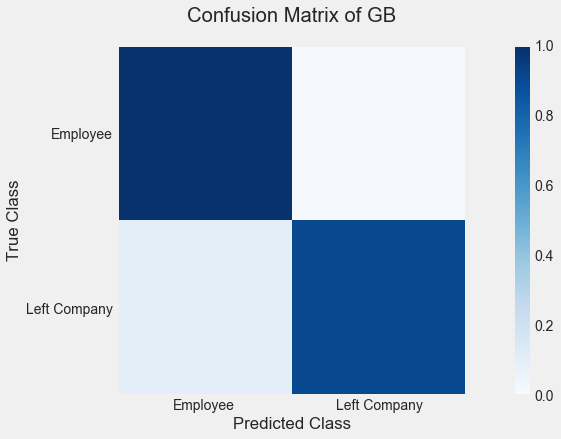

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.98      3485
       Left       0.94      0.91      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 641
False Positives: 38
True Negatives: 3447
False Negatives: 67



**Name: Gradient Boosting (correlation identified)**

Accuracy on Validation Dataset: 95.13%
Timing on Validation Dataset: 0.39s


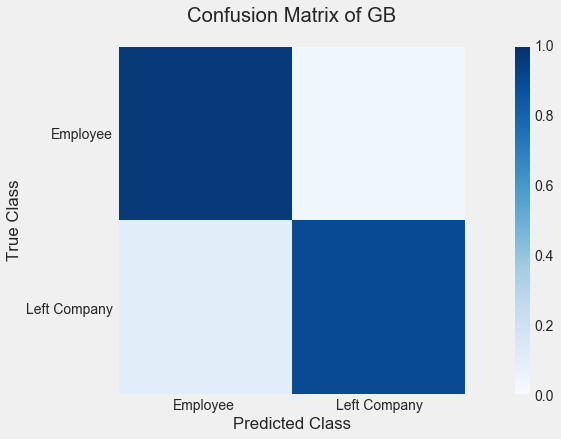

             precision    recall  f1-score   support

   Employee       0.98      0.96      0.97      3485
       Left       0.83      0.89      0.86       708

avg / total       0.95      0.95      0.95      4193

True Positives: 631
False Positives: 127
True Negatives: 3358
False Negatives: 77



**Name: Gradient Boosting (KBest)**

Accuracy on Validation Dataset: 96.61%
Timing on Validation Dataset: 0.53s


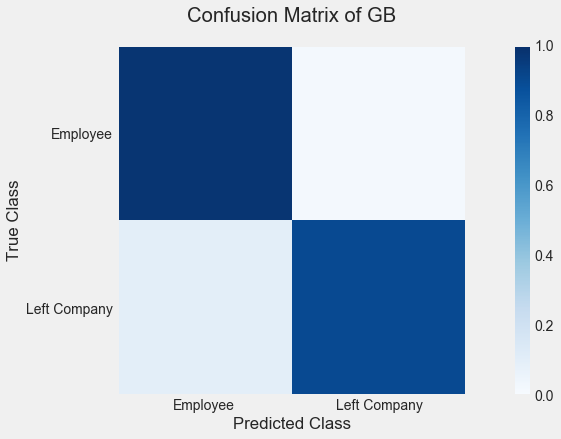

             precision    recall  f1-score   support

   Employee       0.98      0.98      0.98      3485
       Left       0.90      0.90      0.90       708

avg / total       0.97      0.97      0.97      4193

True Positives: 637
False Positives: 71
True Negatives: 3414
False Negatives: 71



**Name: Gradient Boosting (Model)**

Accuracy on Validation Dataset: 97.42%
Timing on Validation Dataset: 0.56s


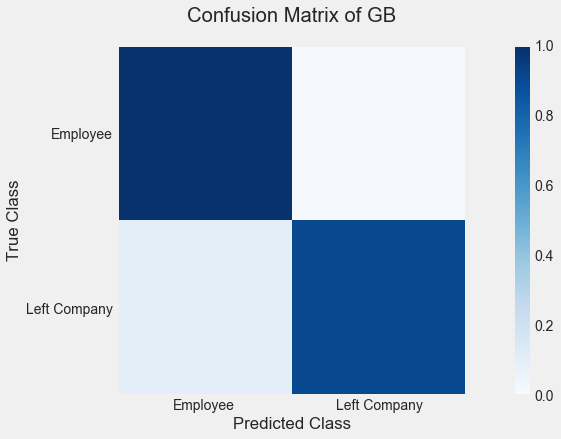

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.98      3485
       Left       0.94      0.90      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 640
False Positives: 40
True Negatives: 3445
False Negatives: 68



**Name: Gradient Boosting (RFE)**

Accuracy on Validation Dataset: 97.50%
Timing on Validation Dataset: 0.80s


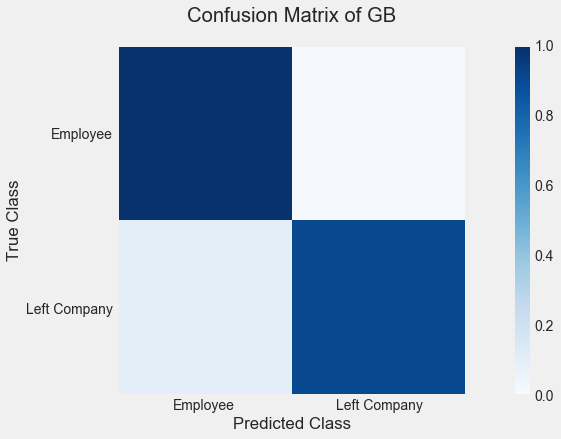

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.98      3485
       Left       0.94      0.91      0.92       708

avg / total       0.97      0.97      0.97      4193

True Positives: 641
False Positives: 38
True Negatives: 3447
False Negatives: 67



In [53]:
classifier_GB = {'GB' : GradientBoostingClassifier(random_state=seed)}

# Train the model on all features
GBClassifier_scores_all_features = evaluate_algos(classifier_GB, X_train, Y_train, X_validation, Y_validation)

# Train the XGBClassifier model on correlation identified features
GBClassifier_scores_corr_features = evaluate_algos(classifier_GB, train_corr_features, Y_train, test_corr_features, Y_validation)

# Train the XGBClassifier model on Univariate Selection features
GBClassifier_scores_KBest_features = evaluate_algos(classifier_GB, KBest_train_features, Y_train, KBest_test_features, Y_validation)

# Train the model on only the GBClassifier Model features
GBClassifier_scores_impt_features = evaluate_algos(classifier_GB, GBClassifier_train_features, Y_train, GBClassifier_test_features, Y_validation)

# Train the model on only the GBClassifier RFE features
GBClassifier_scores_impt_features_RFE = evaluate_algos(classifier_GB, GBClassifier_RFE_train_features, Y_train, GBClassifier_RFE_test_features, Y_validation)

print_scores(GBClassifier_scores_all_features, "Gradient Boosting (All)")
print_scores(GBClassifier_scores_corr_features, "Gradient Boosting (correlation identified)")
print_scores(GBClassifier_scores_KBest_features, "Gradient Boosting (KBest)")
print_scores(GBClassifier_scores_impt_features, "Gradient Boosting (Model)")
print_scores(GBClassifier_scores_impt_features_RFE, "Gradient Boosting (RFE)")

##### 7.5.2.4. Extra Trees Classifier

**Name: Extra Trees (All)**

Accuracy on Validation Dataset: 97.19%
Timing on Validation Dataset: 0.14s


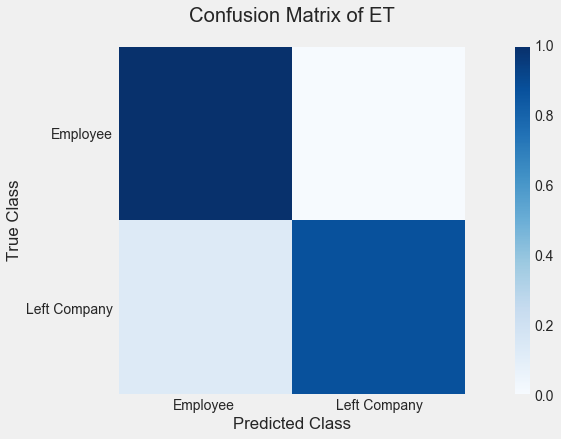

             precision    recall  f1-score   support

   Employee       0.97      0.99      0.98      3485
       Left       0.96      0.87      0.91       708

avg / total       0.97      0.97      0.97      4193

True Positives: 617
False Positives: 27
True Negatives: 3458
False Negatives: 91



**Name: Extra Trees (correlation identified)**

Accuracy on Validation Dataset: 95.33%
Timing on Validation Dataset: 0.05s


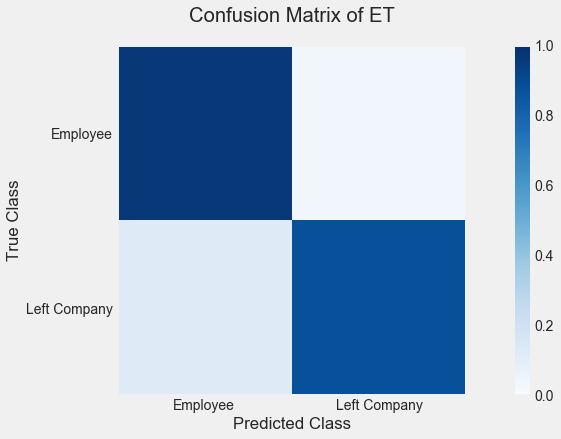

             precision    recall  f1-score   support

   Employee       0.97      0.97      0.97      3485
       Left       0.85      0.88      0.86       708

avg / total       0.95      0.95      0.95      4193

True Positives: 621
False Positives: 109
True Negatives: 3376
False Negatives: 87



**Name: Extra Trees (KBest)**

Accuracy on Validation Dataset: 96.11%
Timing on Validation Dataset: 0.07s


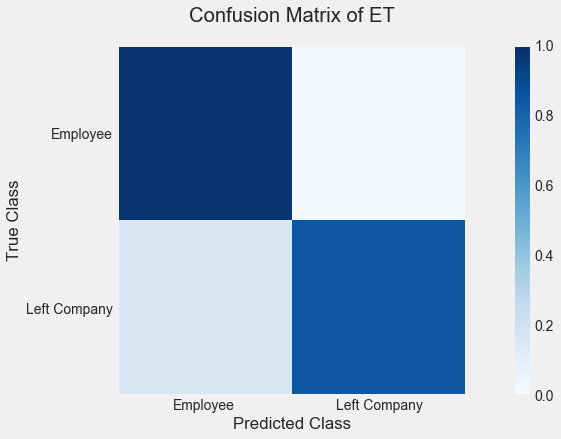

             precision    recall  f1-score   support

   Employee       0.97      0.98      0.98      3485
       Left       0.91      0.85      0.88       708

avg / total       0.96      0.96      0.96      4193

True Positives: 602
False Positives: 57
True Negatives: 3428
False Negatives: 106



**Name: Extra Trees (Model)**

Accuracy on Validation Dataset: 97.54%
Timing on Validation Dataset: 0.06s


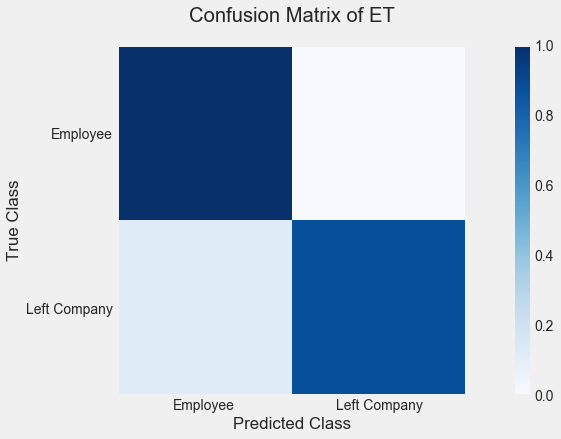

             precision    recall  f1-score   support

   Employee       0.98      0.99      0.99      3485
       Left       0.97      0.88      0.92       708

avg / total       0.98      0.98      0.97      4193

True Positives: 625
False Positives: 20
True Negatives: 3465
False Negatives: 83



**Name: Extra Trees (RFE)**

Accuracy on Validation Dataset: 96.68%
Timing on Validation Dataset: 0.06s


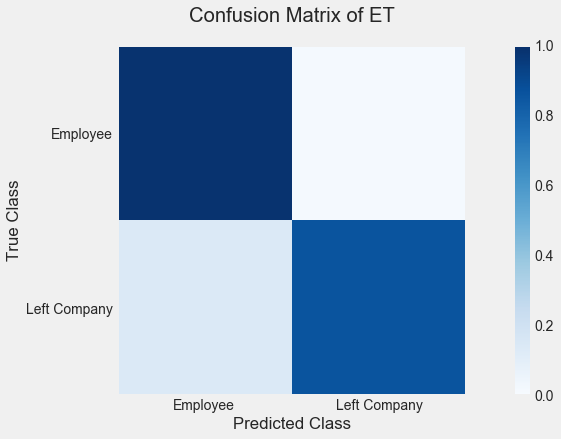

             precision    recall  f1-score   support

   Employee       0.97      0.99      0.98      3485
       Left       0.94      0.86      0.90       708

avg / total       0.97      0.97      0.97      4193

True Positives: 610
False Positives: 41
True Negatives: 3444
False Negatives: 98



In [54]:
classifier_ET = {'ET' : ExtraTreesClassifier(random_state=seed)}

# Train the model on all features
ETClassifier_scores_all_features = evaluate_algos(classifier_ET, X_train, Y_train, X_validation, Y_validation)

# Train the ETClassifier model on correlation identified features
ETClassifier_scores_corr_features = evaluate_algos(classifier_ET, train_corr_features, Y_train, test_corr_features, Y_validation)

# Train the ETClassifier model on Univariate Selection features
ETClassifier_scores_KBest_features = evaluate_algos(classifier_ET, KBest_train_features, Y_train, KBest_test_features, Y_validation)

# Train the model on only the ETClassifier Model features
ETClassifier_scores_impt_features = evaluate_algos(classifier_ET, ETClassifier_train_features, Y_train, ETClassifier_test_features, Y_validation)

# Train the model on only the ETClassifier RFE features
ETClassifier_scores_impt_features_RFE = evaluate_algos(classifier_ET, ETClassifier_RFE_train_features, Y_train, ETClassifier_RFE_test_features, Y_validation)

print_scores(ETClassifier_scores_all_features, "Extra Trees (All)")
print_scores(ETClassifier_scores_corr_features, "Extra Trees (correlation identified)")
print_scores(ETClassifier_scores_KBest_features, "Extra Trees (KBest)")
print_scores(ETClassifier_scores_impt_features, "Extra Trees (Model)")
print_scores(ETClassifier_scores_impt_features_RFE, "Extra Trees (RFE)")

#### 7.5.3. Scores comparison

From the generated scores from the classifier performance evaluated above, we compare the performance by each classifier and for all

In [55]:
def CompareScores(Scores):
    Scores_sorted_by_value = OrderedDict(sorted(Scores.items(), key=lambda x: -x[1][0][2]))

    score_list = list(Scores_sorted_by_value.values())
    score_name_list = list(Scores_sorted_by_value.keys())

    names = [item[0][0] for item in score_list]
    runtimes = [item[0][1] for item in score_list]
    accuracies = [item[0][2] for item in score_list]
    roc_aucs = [item[0][3] for item in score_list]
    cms = [item[0][4] for item in score_list]
    crs = [item[0][5] for item in score_list]
    tps = [item[0][6] for item in score_list]
    fps = [item[0][7] for item in score_list]
    tns = [item[0][8] for item in score_list]
    fns = [item[0][9] for item in score_list]
    fpr = list([item[0][10] for item in score_list])  
    tpr = list([item[0][11] for item in score_list])  
    ROC_AUC = list([item[0][12] for item in score_list]) 
    precision = list([item[0][13] for item in score_list])  
    recall = list([item[0][14] for item in score_list])  
    pr_scores = list([item[0][15] for item in score_list]) 
    PltBar = [fps, fns]
    idx = [i for i, _ in enumerate(names)]

    pyplot.rcParams['figure.figsize'] = [15, 6]
    plt.subplot(1,3,1)
    plt.title("Accuracy")
    plt.bar(idx,accuracies, color = 'b', width = 0.5)
    plt.xticks(idx, score_name_list, rotation=90)
    plt.subplot(1,3,2)
    plt.title("ROC_AUC")
    plt.bar(idx,roc_aucs, color = 'g', width = 0.5)
    plt.xticks(idx, score_name_list, rotation=90)
    plt.subplot(1,3,3)
    plt.title("timings")
    plt.bar(idx,runtimes, color = 'g', width = 0.5)
    plt.xticks(idx, score_name_list, rotation=90)
    plt.show()

    df = pd.DataFrame(PltBar,
        index=['False Positive', 'False Negative'],
        columns=pd.Index(score_name_list, 
        name='Algorithm')).round(2)

    df.plot(kind='bar',figsize=(15,6))

    ax = plt.gca()
    pos = []
    for bar in ax.patches:
        pos.append(bar.get_x()+bar.get_width()/2.)

    ax.set_xticks(pos,minor=True)
    lab = []
    for i in range(len(pos)):
        l = df.columns.values[i//len(df.index.values)]
        lab.append(l)

    ax.set_xticklabels(lab,minor=True, rotation=90, size=12)
    ax.tick_params(axis='x', which='major', pad=250, size=0)
    #ax.legend(loc='upper right', frameon=False)
    plt.setp(ax.get_xticklabels(), rotation=0)

    plt.show()
    
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plot_ROC_curve(fpr, tpr, ROC_AUC, names)
    plt.subplot(122)
    plot_PrecisionRecall_curve(precision, recall, pr_scores, names)
    plt.show()    

In [56]:
def AnalyzeImprovement(title1, scores): 
    ImprovedDicts = {}
    Improved_TimingDicts = {}
    
    for key in (scores):
        ImprovedDictVal = {}
        ImprovedDict_TimingVal = {}
        ImprovedDictVal["Accuracy"] = ((scores[key][1][0][2] - scores[key][0][0][2]) / scores[key][0][0][2]) * 100
        ImprovedDictVal["True Positives"] = ((scores[key][1][0][6] - scores[key][0][0][6]) / scores[key][0][0][6]) * 100
        ImprovedDictVal["False Positives"] = ((scores[key][0][0][7] - scores[key][1][0][7]) / scores[key][0][0][7]) * 100
        ImprovedDictVal["True Negatives"] = ((scores[key][1][0][8] - scores[key][0][0][8]) / scores[key][0][0][8]) * 100
        ImprovedDictVal["False Negatives"] = ((scores[key][0][0][9] - scores[key][1][0][9]) / scores[key][0][0][9]) * 100
        ImprovedDicts[key] = ImprovedDictVal
        
        ImprovedDict_TimingVal["Timing"] = ((scores[key][0][0][1] - scores[key][1][0][1]) / scores[key][0][0][1]) * 100
        Improved_TimingDicts[key] = ImprovedDict_TimingVal
    
    #display(HTML(pd.DataFrame(ImprovedDicts).to_html()))
    #display(HTML(pd.DataFrame(Improved_TimingDicts).to_html()))
    
    ax = pd.DataFrame(ImprovedDicts).plot(kind='bar', title=title1 ,legend=True, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.legend(fontsize=15)
    ax.set_xlabel("Metrics",fontsize=15)
    ax.set_ylabel("%",fontsize=15)
    
    ax = pd.DataFrame(Improved_TimingDicts).plot(kind='bar', title=title1 + " (timing)", legend=False, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel("Metrics",fontsize=15)
    ax.set_ylabel("%",fontsize=15)

###### 7.5.3.1. Random Forest Classifier

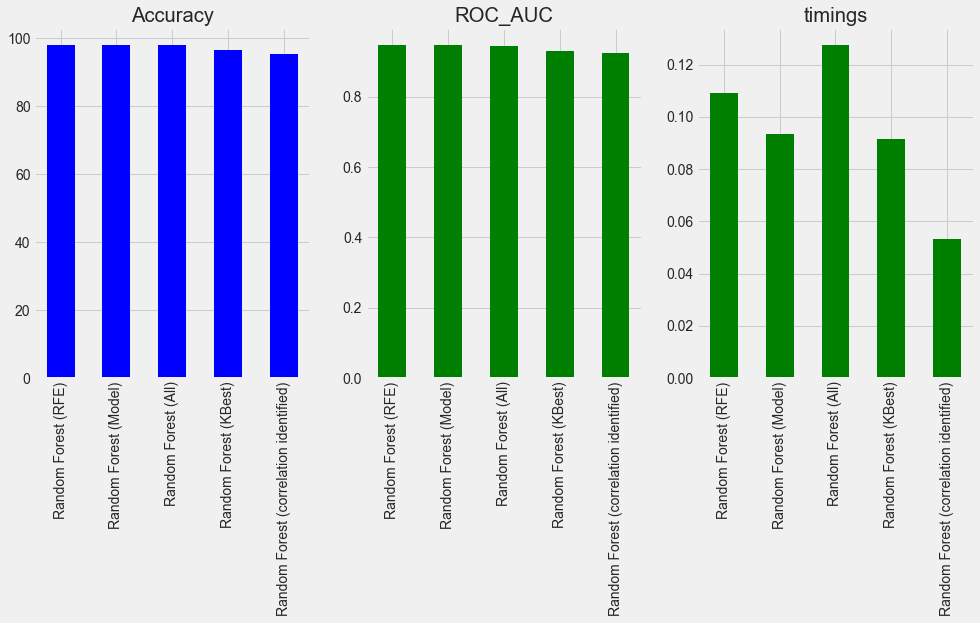

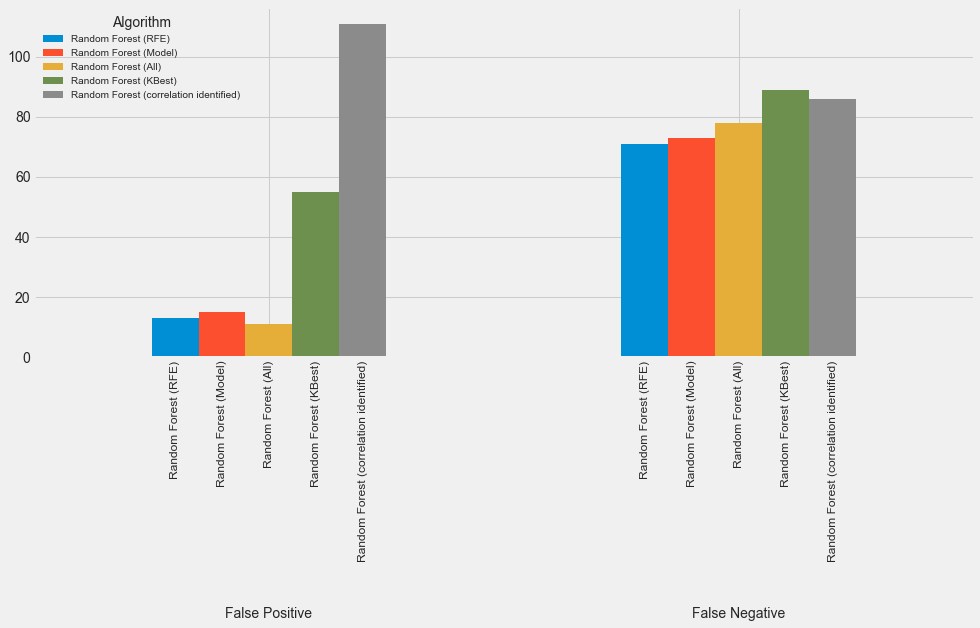

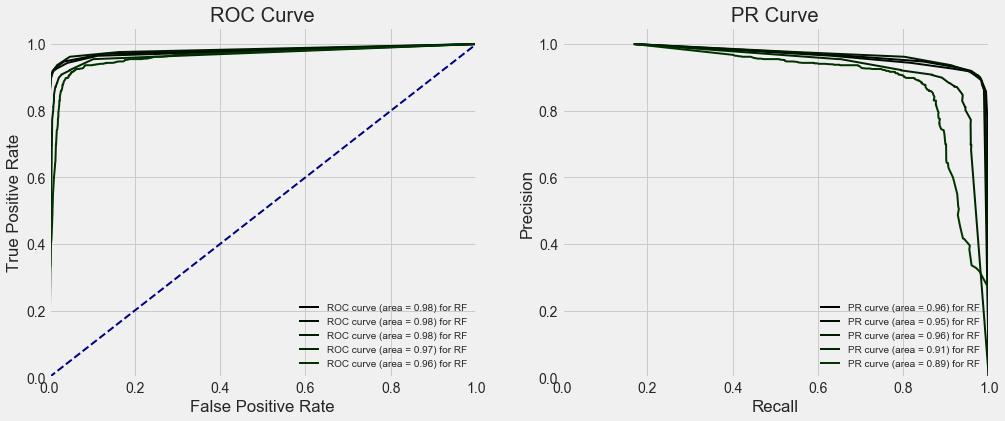

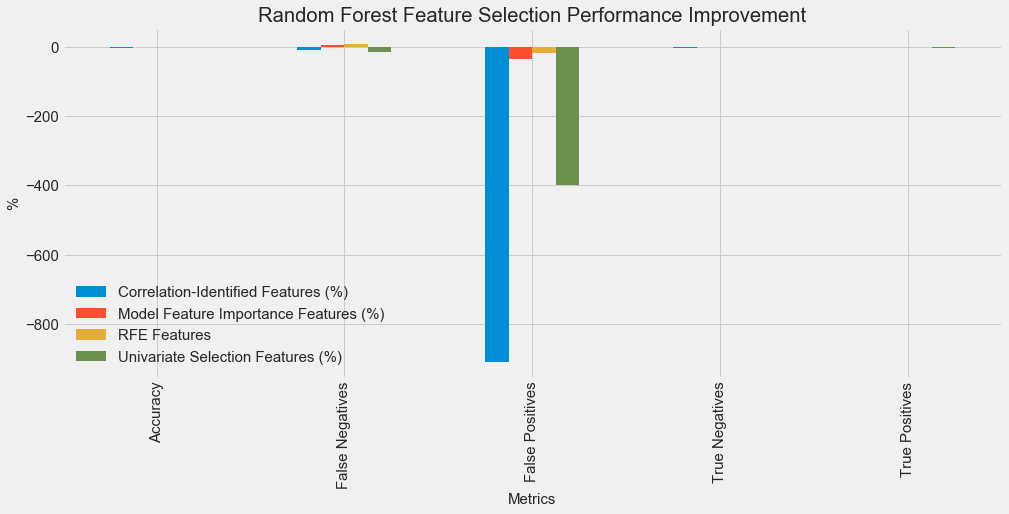

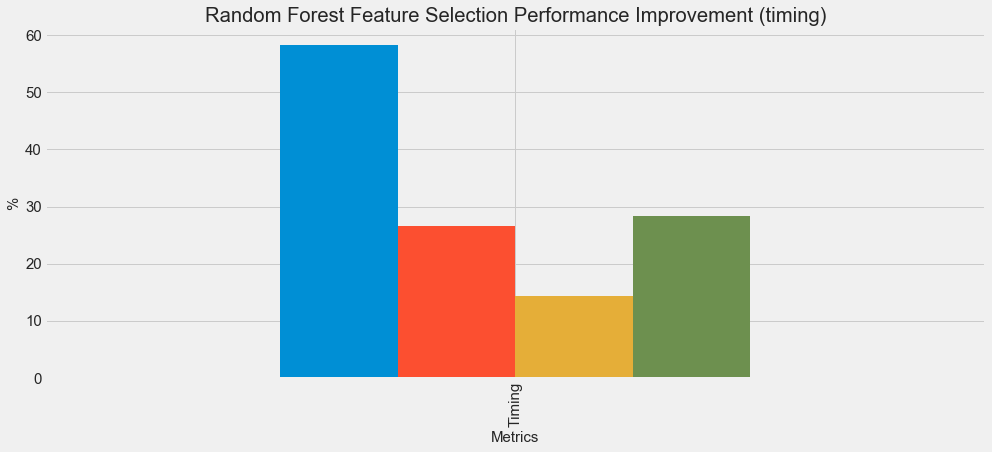

In [57]:
from collections import OrderedDict

Scores_ = {"Random Forest (All)" : RFClassifier_scores_all_features,
           "Random Forest (correlation identified)" : RFClassifier_scores_corr_features,
           "Random Forest (KBest)" : RFClassifier_scores_KBest_features,
           "Random Forest (Model)" : RFClassifier_scores_impt_features,
           "Random Forest (RFE)" : RFClassifier_scores_impt_features_RFE,
           }

CompareScores(Scores_)

scores_Features = {"Correlation-Identified Features (%)" : (RFClassifier_scores_all_features, RFClassifier_scores_corr_features),
          "Univariate Selection Features (%)" : (RFClassifier_scores_all_features, RFClassifier_scores_KBest_features),
          "Model Feature Importance Features (%)" : (RFClassifier_scores_all_features, RFClassifier_scores_impt_features),
          "RFE Features" : (RFClassifier_scores_all_features, RFClassifier_scores_impt_features_RFE)
         }

AnalyzeImprovement("Random Forest Feature Selection Performance Improvement", scores_Features)

###### 7.5.3.2. XG Boost Classifier

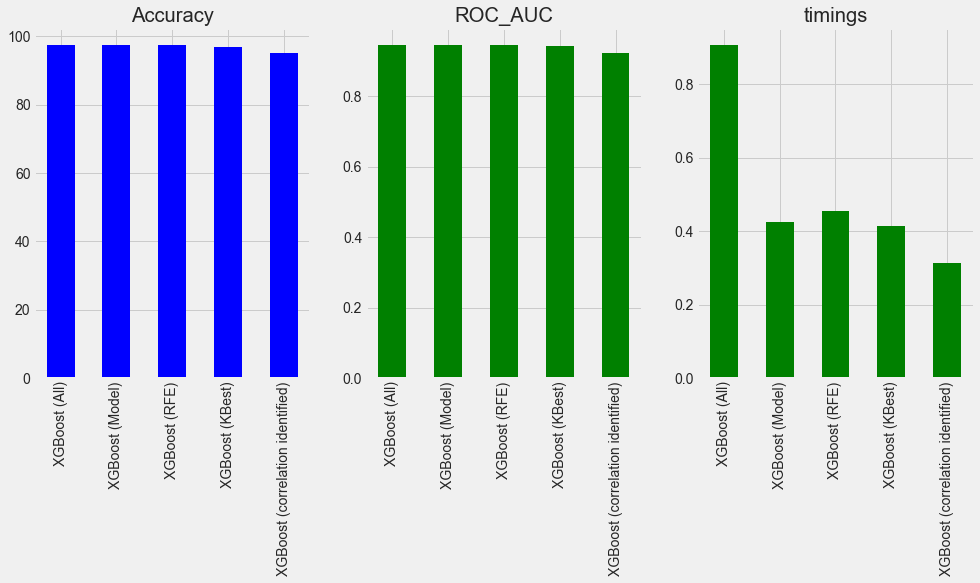

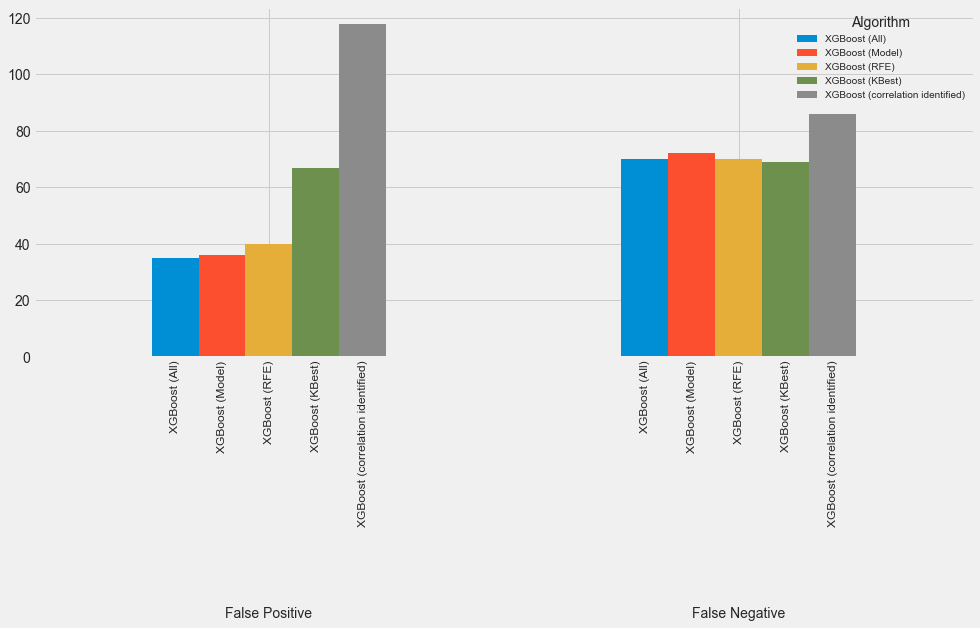

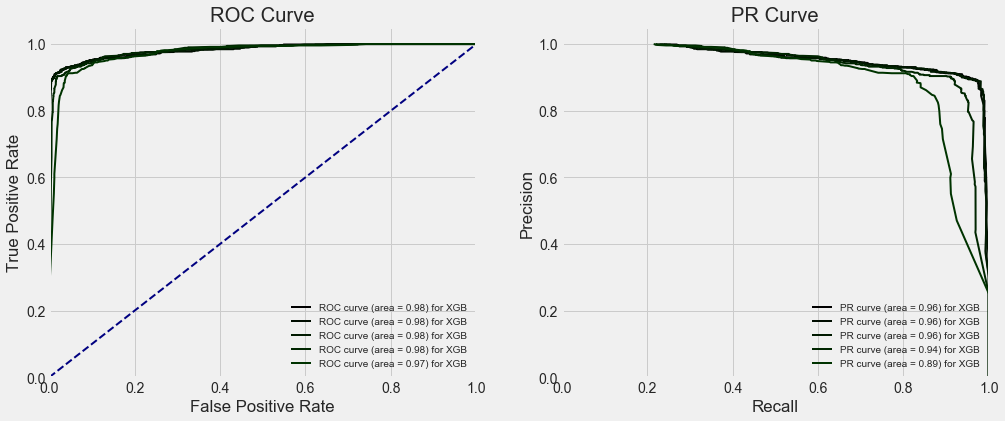

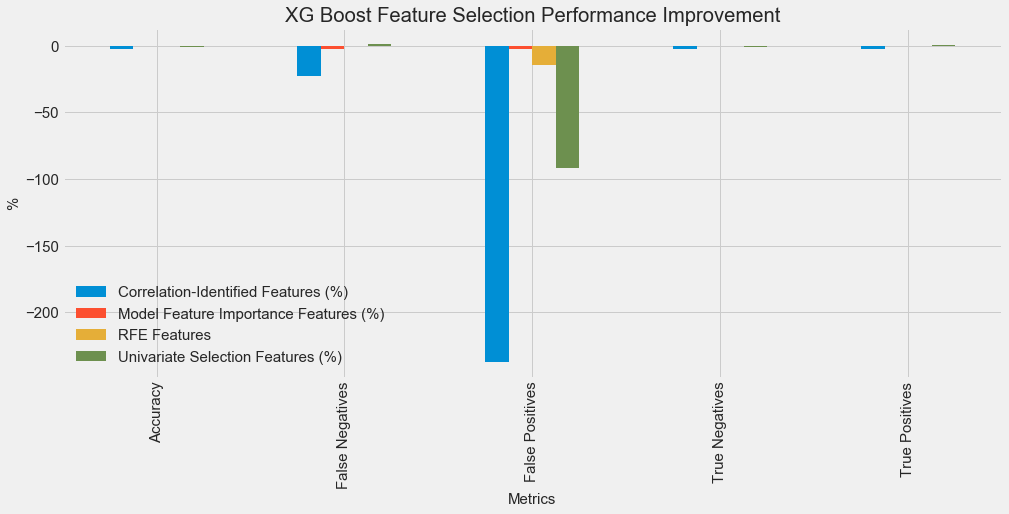

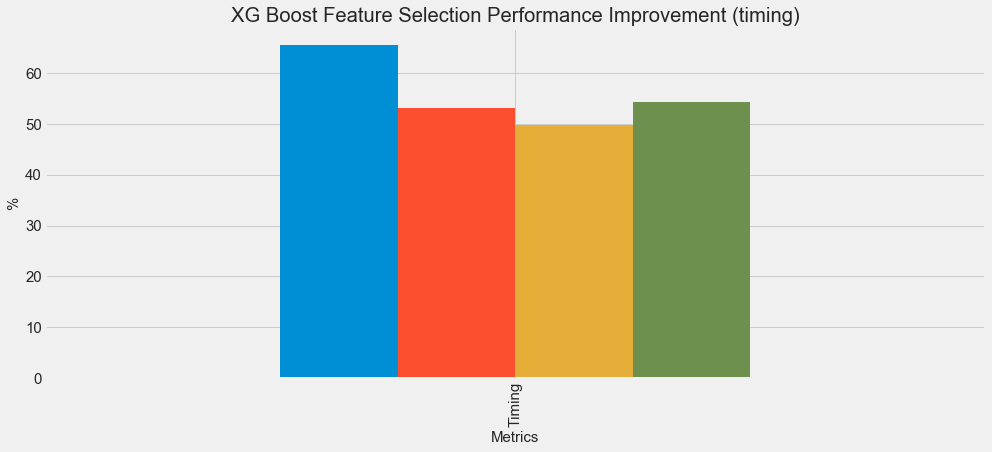

In [58]:
from collections import OrderedDict

Scores_ = {"XGBoost (All)" : XGBClassifier_scores_all_features,
           "XGBoost (correlation identified)" : XGBClassifier_scores_corr_features,
           "XGBoost (KBest)" : XGBClassifier_scores_KBest_features,
           "XGBoost (Model)" : XGBClassifier_scores_impt_features,
           "XGBoost (RFE)" : XGBClassifier_scores_impt_features_RFE}

CompareScores(Scores_)

scores_Features = {"Correlation-Identified Features (%)" : (XGBClassifier_scores_all_features, XGBClassifier_scores_corr_features),
          "Univariate Selection Features (%)" : (XGBClassifier_scores_all_features, XGBClassifier_scores_KBest_features),
          "Model Feature Importance Features (%)" : (XGBClassifier_scores_all_features, XGBClassifier_scores_impt_features),
          "RFE Features" : (XGBClassifier_scores_all_features, XGBClassifier_scores_impt_features_RFE)
         }

AnalyzeImprovement("XG Boost Feature Selection Performance Improvement", scores_Features)

###### 7.5.3.3. Gradient Boosting Classifier

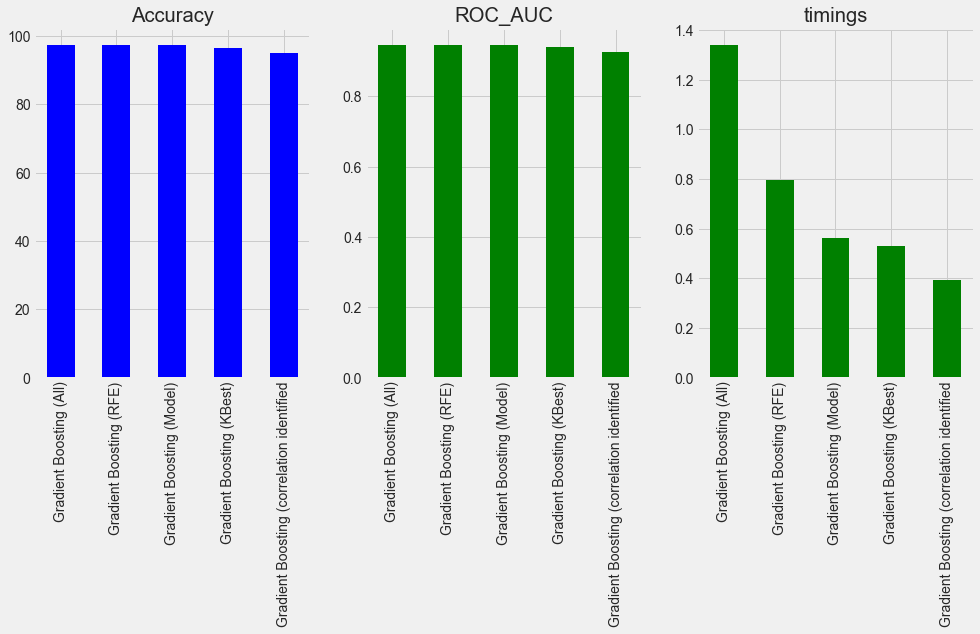

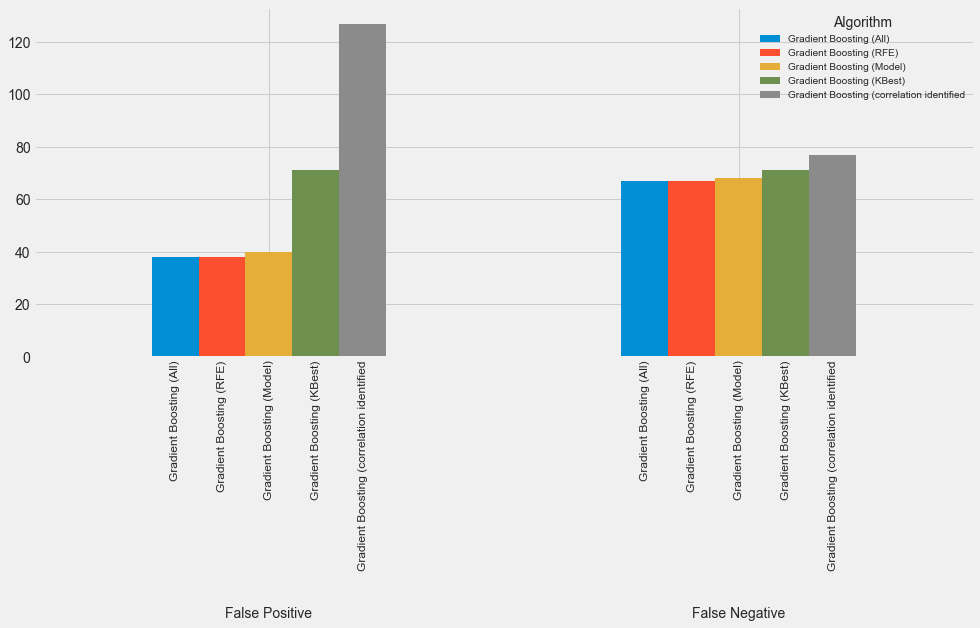

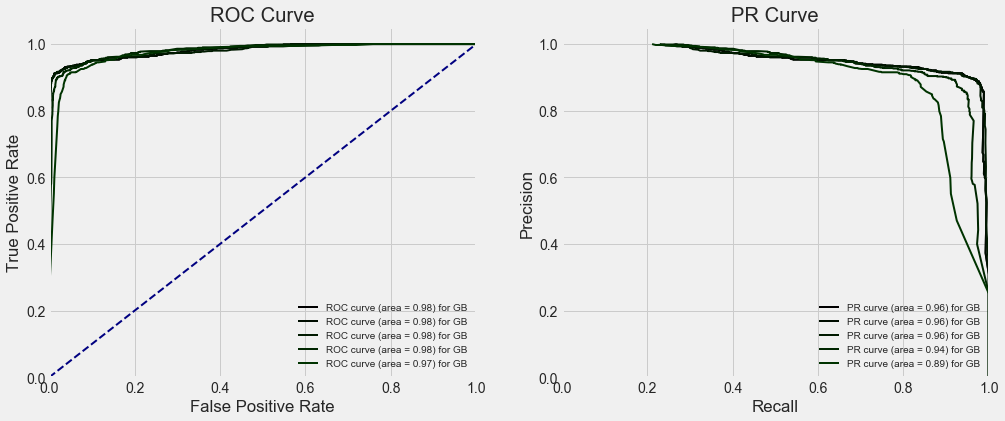

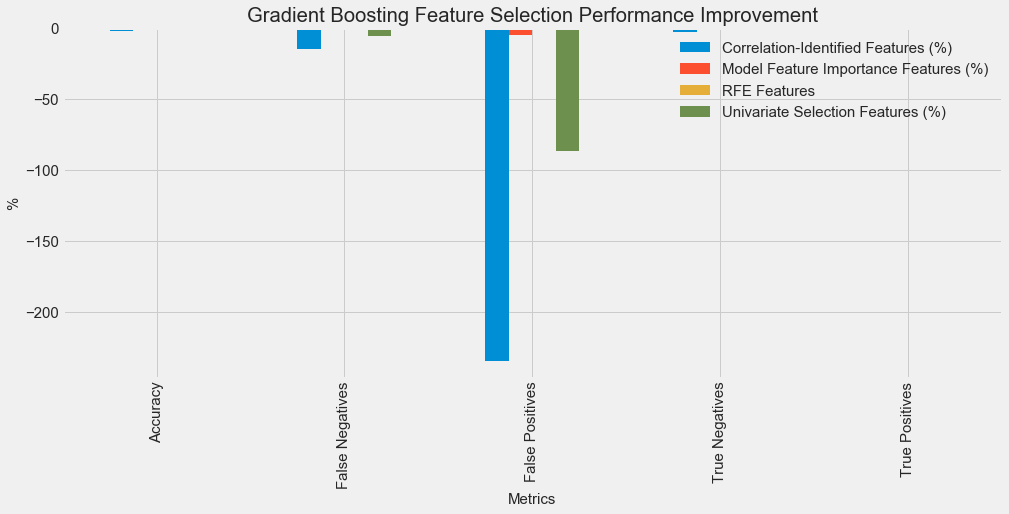

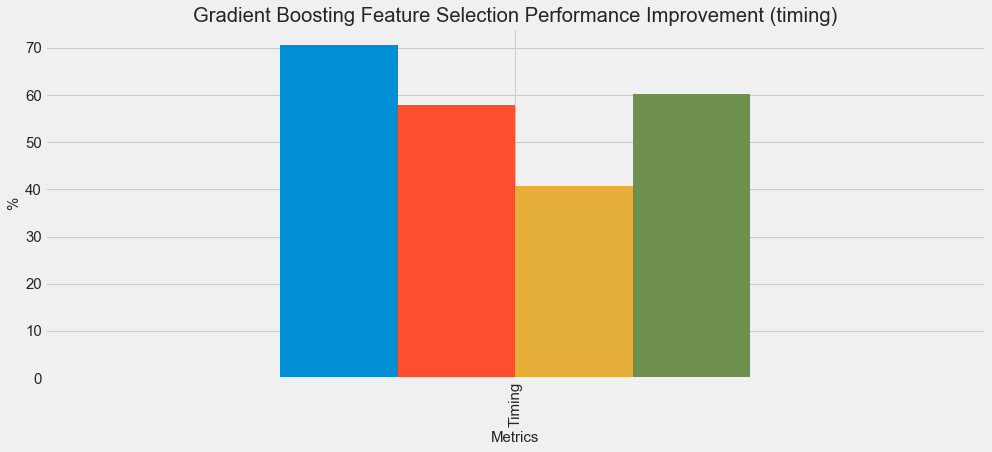

In [59]:
from collections import OrderedDict

Scores_ = {"Gradient Boosting (All)" : GBClassifier_scores_all_features,
           "Gradient Boosting (correlation identified" : GBClassifier_scores_corr_features,
           "Gradient Boosting (KBest)" : GBClassifier_scores_KBest_features,
           "Gradient Boosting (Model)" : GBClassifier_scores_impt_features,
           "Gradient Boosting (RFE)" : GBClassifier_scores_impt_features_RFE}

CompareScores(Scores_)

scores_Features = {"Correlation-Identified Features (%)" : (GBClassifier_scores_all_features, GBClassifier_scores_corr_features),
          "Univariate Selection Features (%)" : (GBClassifier_scores_all_features, GBClassifier_scores_KBest_features),
          "Model Feature Importance Features (%)" : (GBClassifier_scores_all_features, GBClassifier_scores_impt_features),
          "RFE Features" : (GBClassifier_scores_all_features, GBClassifier_scores_impt_features_RFE)
         }

AnalyzeImprovement("Gradient Boosting Feature Selection Performance Improvement", scores_Features)

###### 7.5.3.4. Extra Trees Classifier

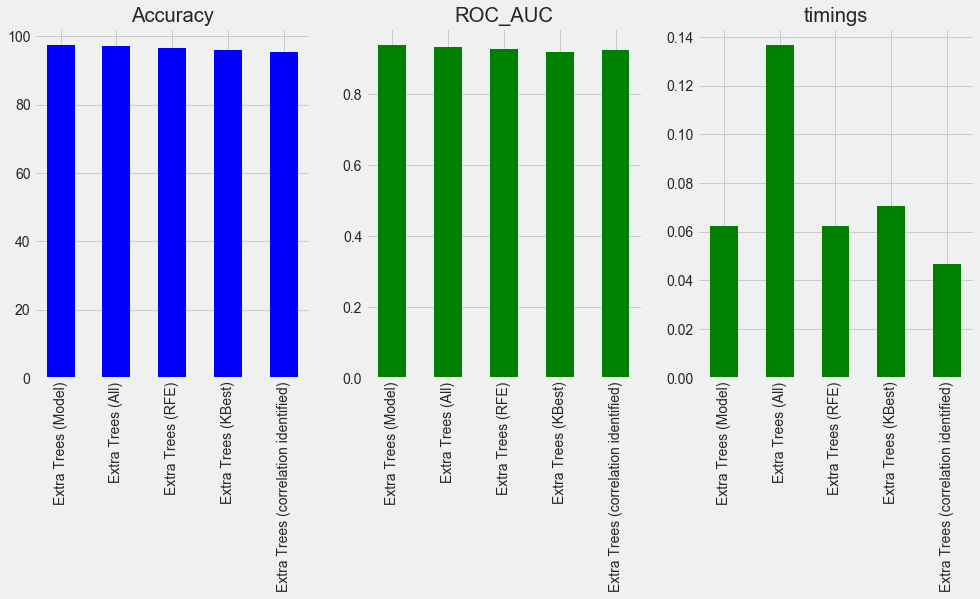

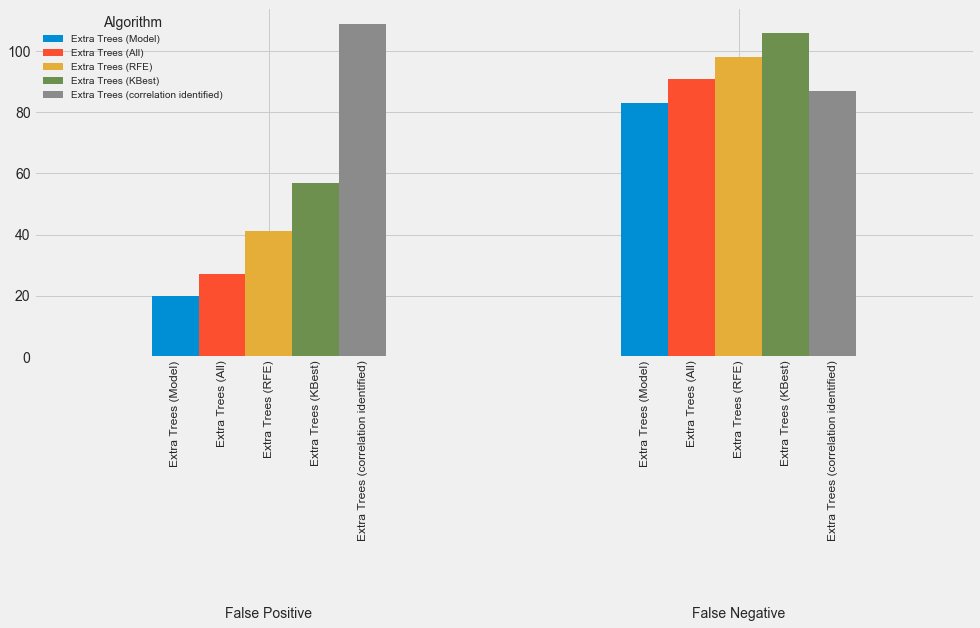

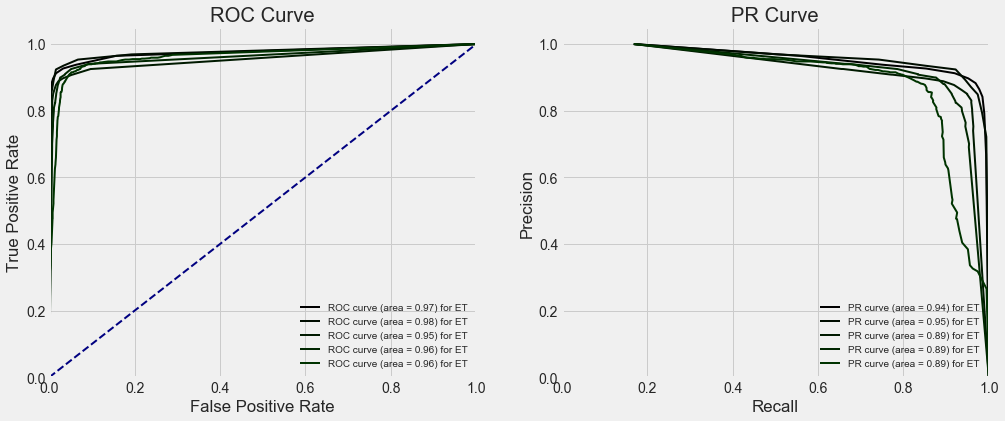

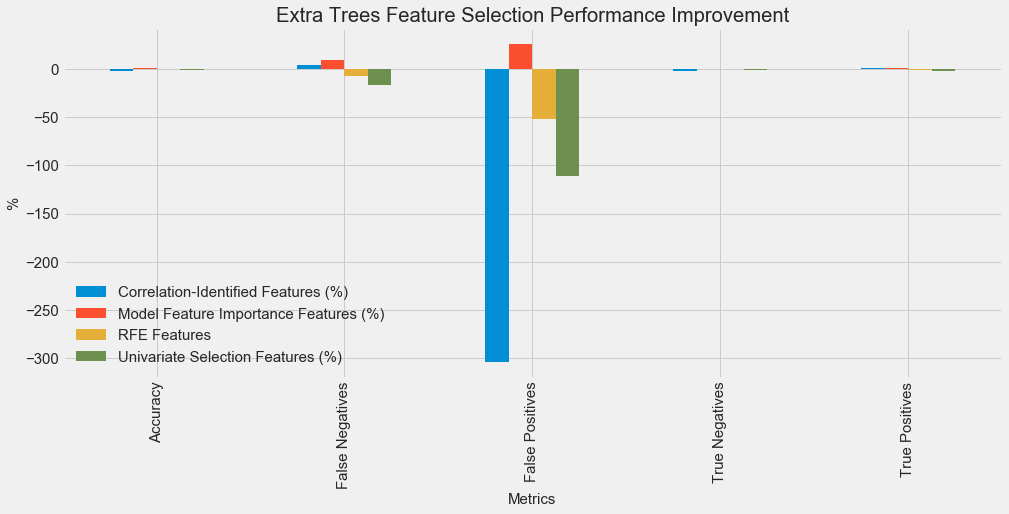

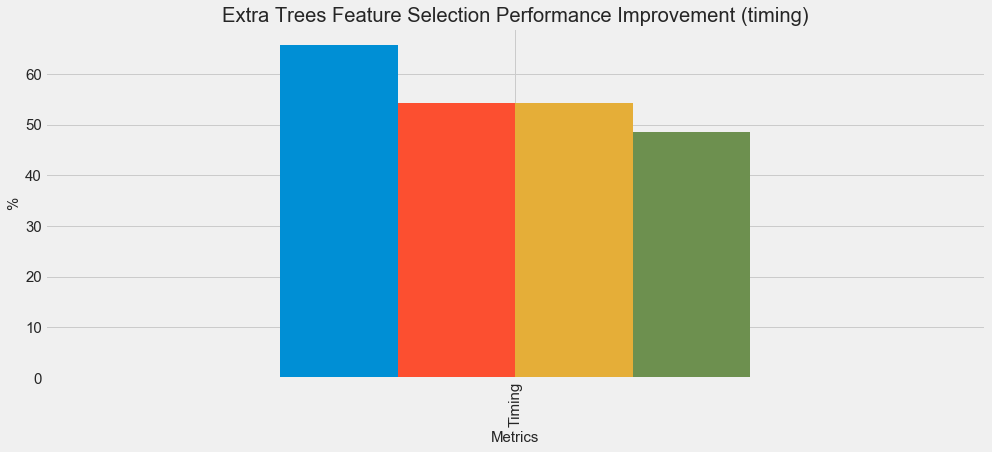

In [60]:
from collections import OrderedDict

Scores_ = {"Extra Trees (All)" : ETClassifier_scores_all_features,
           "Extra Trees (correlation identified)" : ETClassifier_scores_corr_features,
           "Extra Trees (KBest)" : ETClassifier_scores_KBest_features,
           "Extra Trees (Model)" : ETClassifier_scores_impt_features,
           "Extra Trees (RFE)" : ETClassifier_scores_impt_features_RFE}

CompareScores(Scores_)

scores_Features = {"Correlation-Identified Features (%)" : (ETClassifier_scores_all_features, ETClassifier_scores_corr_features),
          "Univariate Selection Features (%)" : (ETClassifier_scores_all_features, ETClassifier_scores_KBest_features),
          "Model Feature Importance Features (%)" : (ETClassifier_scores_all_features, ETClassifier_scores_impt_features),
          "RFE Features" : (ETClassifier_scores_all_features, ETClassifier_scores_impt_features_RFE)
         }

AnalyzeImprovement("Extra Trees Feature Selection Performance Improvement", scores_Features)

###### 7.5.3.5. All Classifiers

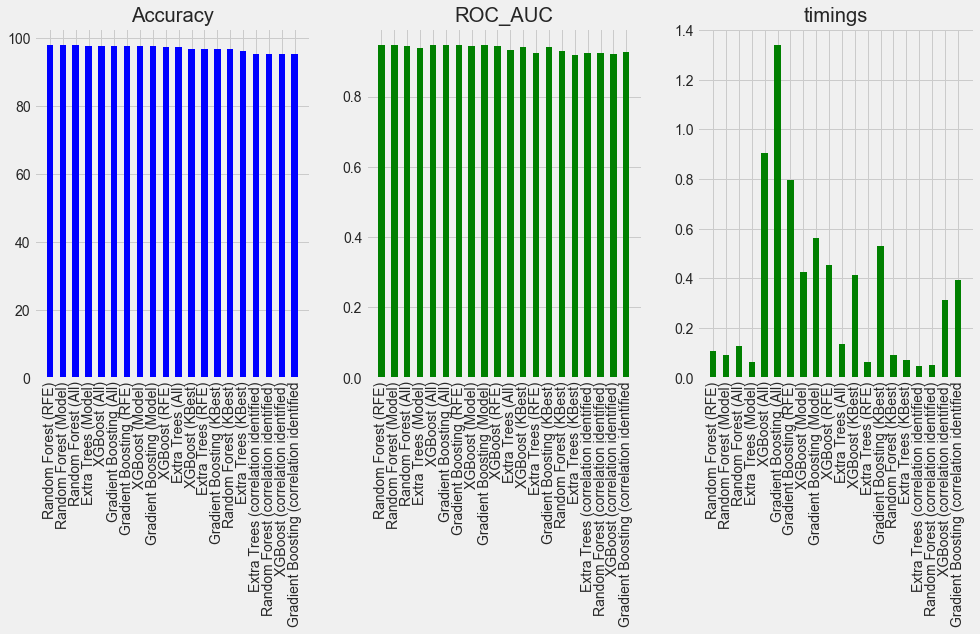

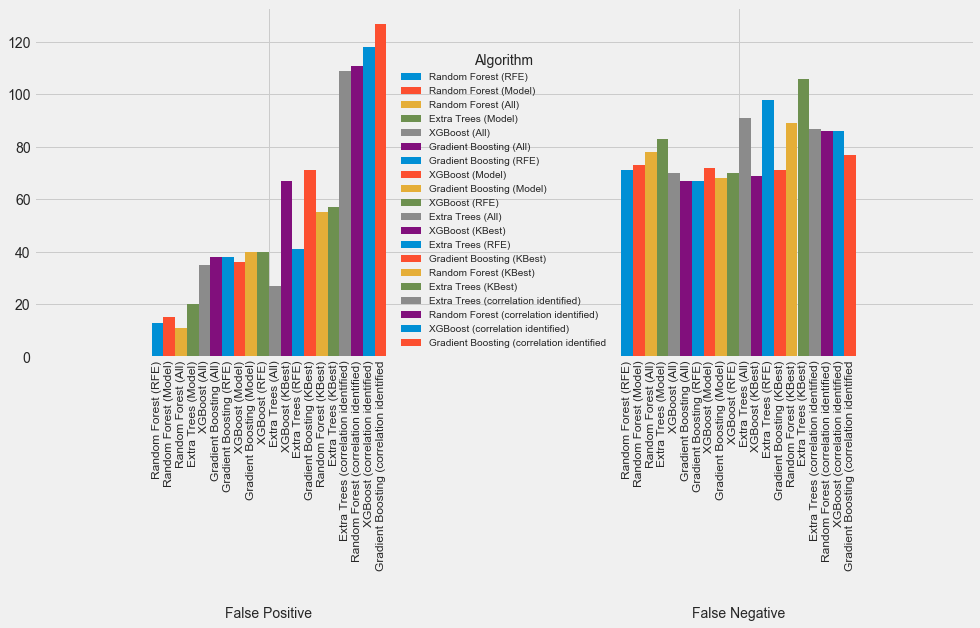

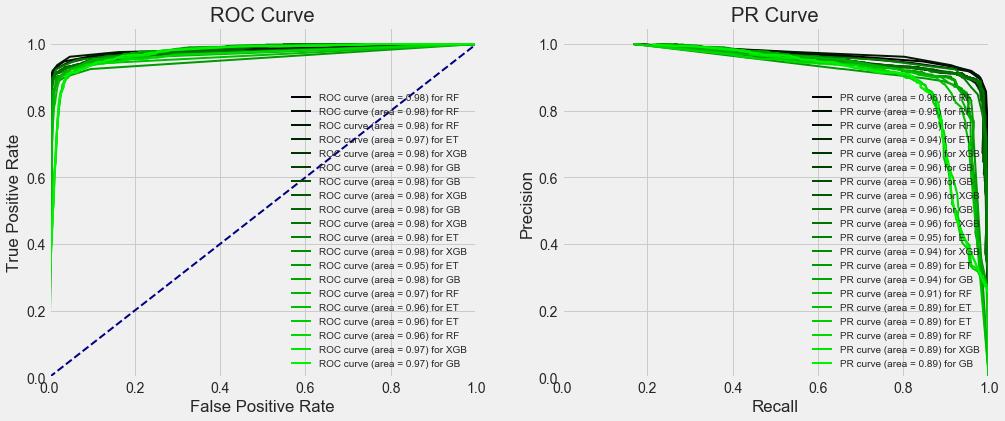

In [61]:
from collections import OrderedDict

Scores_ = {"Random Forest (All)" : RFClassifier_scores_all_features,
           "Random Forest (correlation identified)" : RFClassifier_scores_corr_features,
           "Random Forest (KBest)" : RFClassifier_scores_KBest_features,
           "Random Forest (Model)" : RFClassifier_scores_impt_features,
           "Random Forest (RFE)" : RFClassifier_scores_impt_features_RFE,
           "XGBoost (All)" : XGBClassifier_scores_all_features,
           "XGBoost (correlation identified)" : XGBClassifier_scores_corr_features,
           "XGBoost (KBest)" : XGBClassifier_scores_KBest_features,
           "XGBoost (Model)" : XGBClassifier_scores_impt_features,
           "XGBoost (RFE)" : XGBClassifier_scores_impt_features_RFE,
           "Gradient Boosting (All)" : GBClassifier_scores_all_features,
           "Gradient Boosting (correlation identified" : GBClassifier_scores_corr_features,
           "Gradient Boosting (KBest)" : GBClassifier_scores_KBest_features,
           "Gradient Boosting (Model)" : GBClassifier_scores_impt_features,
           "Gradient Boosting (RFE)" : GBClassifier_scores_impt_features_RFE,
           "Extra Trees (All)" : ETClassifier_scores_all_features,
           "Extra Trees (correlation identified)" : ETClassifier_scores_corr_features,
           "Extra Trees (KBest)" : ETClassifier_scores_KBest_features,
           "Extra Trees (Model)" : ETClassifier_scores_impt_features,
           "Extra Trees (RFE)" : ETClassifier_scores_impt_features_RFE}

CompareScores(Scores_)

From the overall performance, we select the following classifier / feature category combination:

1. Random Forest (RFE)
2. XG Boost (All)
3. Gradient Boosting (All)
4. Extra Trees (All)

### 7.6. Test Dataset Prediction Performance <a class="anchor" id="Test-Dataset-Prediction-Performance"></a>

Based on the selected classifier/ feature category identified above, we perform evaluation on the test dataset 

#### 7.6.1. Prepare Test Dataset

In [62]:
# Evaluate test.csv
df = pd.read_csv('DataSet/test.csv', sep=',')

features_df = pd.get_dummies(df.drop("Attrition", axis=1), columns=["Department", "salary"])
features_df = features_df.drop("ID",axis=1)
class_df = df["Attrition"]

X = features_df.as_matrix()
y = class_df.as_matrix()

#### 7.6.2. Evaluate Selected Classifiers / Features

##### 7.6.2.1. XG Boost Classifier (All features)

**Name: XGB (All) on Test Dataset**

Accuracy on Validation Dataset: 97.89%
Timing on Validation Dataset: 0.88s


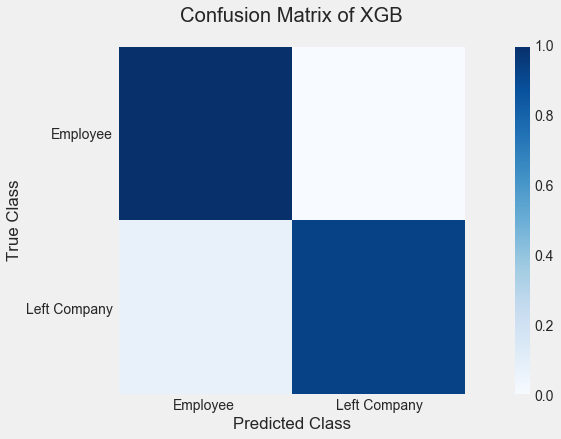

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3355
       Left       0.99      0.93      0.96      1152

avg / total       0.98      0.98      0.98      4507

True Positives: 1068
False Positives: 11
True Negatives: 3344
False Negatives: 84



In [63]:
classifiers = {'XGB' : XGBClassifier(random_state=seed)}
scores_test_XGB = evaluate_algos(classifiers, X_train, Y_train, X, y)
print_scores(scores_test_XGB, "XGB (All) on Test Dataset")

##### 7.6.2.2. Random Forest Classifier (RFE selected features)

**Name: Random Forest (RFE) on Test Dataset**

Accuracy on Validation Dataset: 98.87%
Timing on Validation Dataset: 0.14s


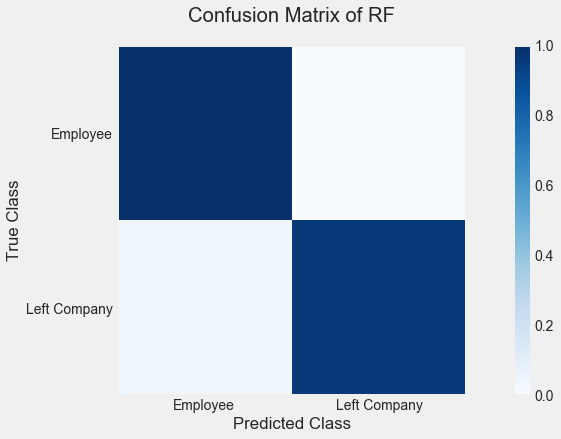

             precision    recall  f1-score   support

   Employee       0.99      1.00      0.99      3355
       Left       0.99      0.96      0.98      1152

avg / total       0.99      0.99      0.99      4507

True Positives: 1108
False Positives: 7
True Negatives: 3348
False Negatives: 44



In [64]:
classifiers = {'RF' : RandomForestClassifier(random_state=seed)
              }

X_RF = X[:, RFClassifier_feature_index_by_importance_RFE[0:RFClassifier_Impt_Feature_Qty_RFE]]

scores_test_RF = evaluate_algos(classifiers, RFClassifier_RFE_train_features, Y_train, X_RF, y)
#scores_test_RF = evaluate_algos(classifiers, X_train, Y_train, X_RF, y)
print_scores(scores_test_RF, "Random Forest (RFE) on Test Dataset")

##### 7.6.2.3. Gradient Boosting Classifier (All features)

**Name: Gradient Boosting (All) on Test Dataset**

Accuracy on Validation Dataset: 98.00%
Timing on Validation Dataset: 1.16s


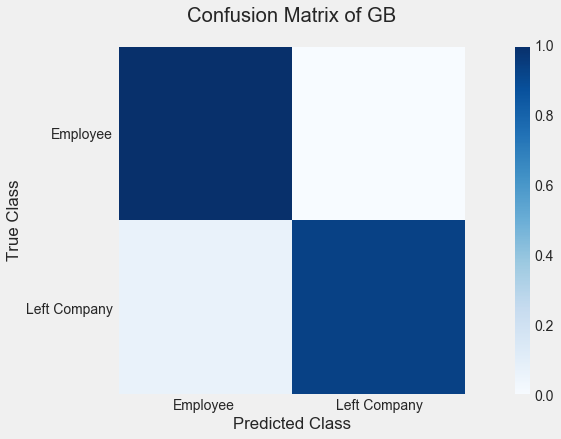

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3355
       Left       0.99      0.93      0.96      1152

avg / total       0.98      0.98      0.98      4507

True Positives: 1075
False Positives: 13
True Negatives: 3342
False Negatives: 77



In [65]:
classifiers = {'GB' : GradientBoostingClassifier(random_state=seed)
              }
scores_test_GB = evaluate_algos(classifiers, X_train, Y_train, X, y)
print_scores(scores_test_GB, "Gradient Boosting (All) on Test Dataset")

##### 7.6.2.4. Extra Trees Classifier (Model features)

**Name: Extra Trees (Model) on Test Dataset**

Accuracy on Validation Dataset: 98.78%
Timing on Validation Dataset: 0.11s


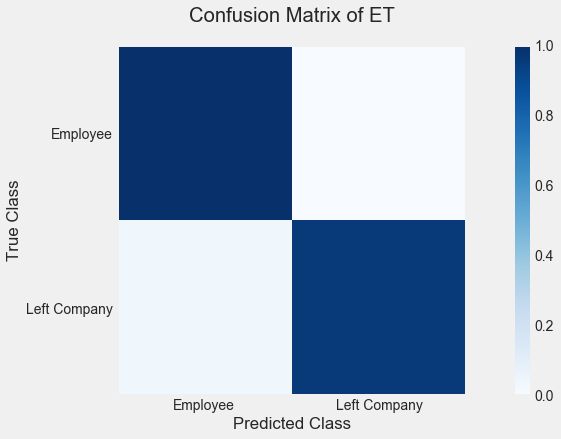

             precision    recall  f1-score   support

   Employee       0.99      1.00      0.99      3355
       Left       0.99      0.96      0.98      1152

avg / total       0.99      0.99      0.99      4507

True Positives: 1107
False Positives: 10
True Negatives: 3345
False Negatives: 45



In [66]:
classifiers = {'ET' : ExtraTreesClassifier(random_state=seed)
              }

X_ET = X[:, ETClassifier_feature_index_by_importance[0:ETClassifier_Impt_Feature_Qty]]

scores_test_ET = evaluate_algos(classifiers, ETClassifier_train_features, Y_train, X_ET, y)
print_scores(scores_test_ET, "Extra Trees (Model) on Test Dataset")

##### 7.6.2.5. Scores Comparison (Test dataset)

We compare the scores generated from the above classifier performance evaluation on the test dataset

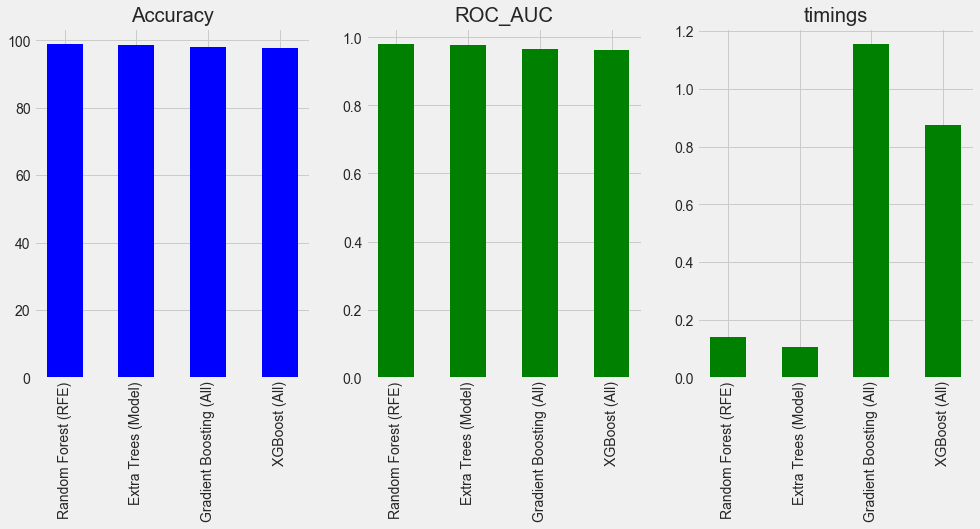

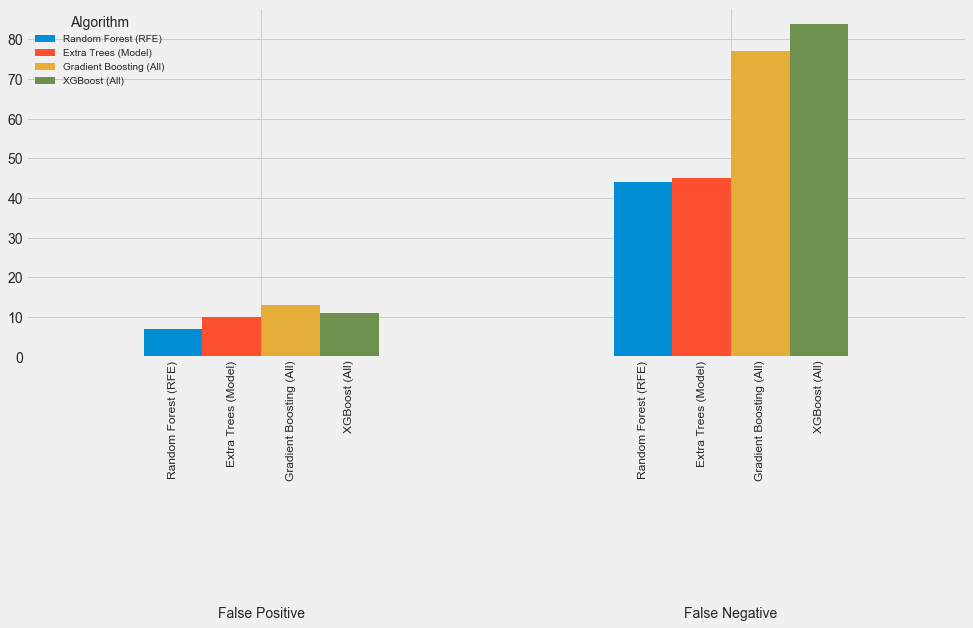

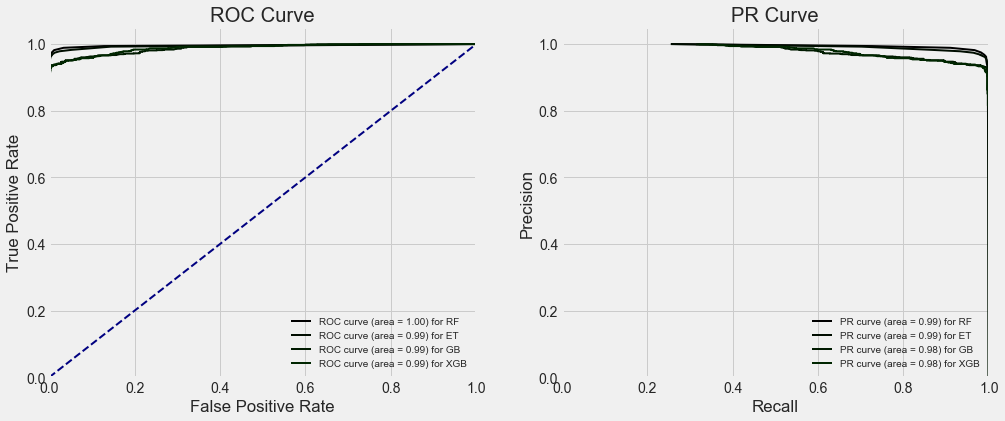

In [67]:
Scores_ = {"XGBoost (All)" : scores_test_XGB,
           "Random Forest (RFE)" : scores_test_RF,
           "Gradient Boosting (All)" : scores_test_GB,
           "Extra Trees (Model)" : scores_test_ET}

CompareScores(Scores_)

### 7.7. Model Tuning <a class="anchor" id="Model-Tuning"></a>

#### 7.7.1. Default Random Forest Classifier Hyper-parameters

In [68]:
from pprint import pprint

rf = RandomForestClassifier(random_state=seed)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


#### 7.7.2. Random Search Cross Validation

In [69]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [x for x in range(10,110,10)]
# Number of features to consider at every split
max_features = [(x + 1) for x in range(len(RFClassifier_RFE_train_features[0]))]
max_depth = [x for x in range(10,110,10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split =[x for x in range(2,8,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in range(1,7,2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [70]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, 
                               cv = 10, verbose=2, random_state=seed, n_jobs = -1)

# Fit the random search model
rf_random.fit(RFClassifier_RFE_train_features, Y_train)

print("Best Params: %s" % rf_random.best_params_)
print("Best Score: %s" % rf_random.best_score_)
print("Best Estimator: %s" % rf_random.best_estimator_)

rf_random_best = rf_random.best_estimator_

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 36.8min finished


Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 60, 'bootstrap': False}
Best Score: 0.9849713740458015
Best Estimator: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=60, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


#### 7.7.3. Grid Search

In [71]:
# Random Forest Algorithm Tuning
param_grid = {
    'max_features': [4],
    'max_depth': [x for x in range(10,110,10)],
    'n_estimators': [x for x in range(100,210,10)],
    'min_samples_split' : [x for x in range(2,8,2)],
    'min_samples_leaf': [x for x in range(1,7,2)], 
    'bootstrap' : [True, False]
}

pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': [4],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]}


In [72]:
# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(rf, param_grid, scoring='accuracy', n_jobs=4, cv=10, verbose=2)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, Y_train)

# Print the parameters that gave us the best result!
print("Best Params: %s" % gs_cv.best_params_)
print("Best Score: %s" % gs_cv.best_score_)
print("Best Estimator: %s" % gs_cv.best_estimator_)

rf_gs_best = gs_cv.best_estimator_

Fitting 10 folds for each of 1980 candidates, totalling 19800 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 21.6min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 28.7min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 36.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 45.9min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 55.9min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 67.1min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 79.1min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 92.1min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 106.1min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 121.6min
[Parallel

Best Params: {'bootstrap': False, 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9844346374045801
Best Estimator: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)


#### 7.7.4. Tuned Model Evaluation

##### 7.7.4.1. Train Dataset

**Name: Tuned Random Forest (RFE) on Train Dataset (using Random Search)**

Accuracy on Validation Dataset: 98.12%
Timing on Validation Dataset: 2.12s


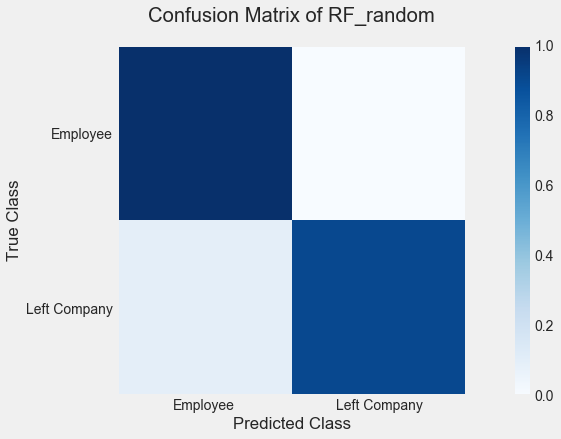

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3485
       Left       0.98      0.91      0.94       708

avg / total       0.98      0.98      0.98      4193

True Positives: 641
False Positives: 12
True Negatives: 3473
False Negatives: 67



In [73]:
classifier_RF_random = {'RF_random' : rf_random_best}

RFClassifier_scores_impt_features_RFE_random = evaluate_algos(classifier_RF_random, RFClassifier_RFE_train_features, Y_train, RFClassifier_RFE_test_features, Y_validation)                 
print_scores(RFClassifier_scores_impt_features_RFE_random, "Tuned Random Forest (RFE) on Train Dataset (using Random Search)")

**Name: Tuned Random Forest (RFE) on Train Dataset (using Grid Search)**

Accuracy on Validation Dataset: 98.12%
Timing on Validation Dataset: 2.10s


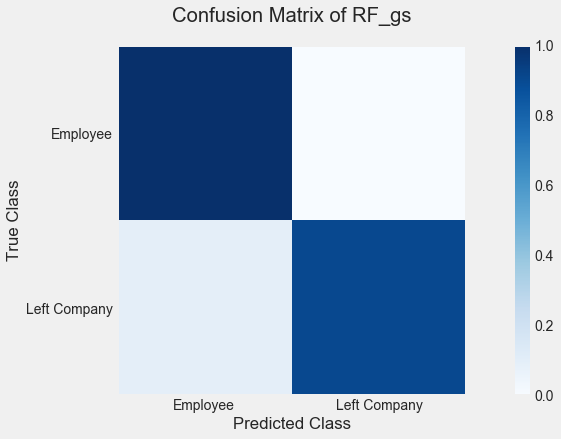

             precision    recall  f1-score   support

   Employee       0.98      1.00      0.99      3485
       Left       0.98      0.91      0.94       708

avg / total       0.98      0.98      0.98      4193

True Positives: 641
False Positives: 12
True Negatives: 3473
False Negatives: 67



In [74]:
classifier_RF_gs = {'RF_gs' : rf_gs_best}

RFClassifier_scores_impt_features_RFE_gs = evaluate_algos(classifier_RF_gs, RFClassifier_RFE_train_features, Y_train, RFClassifier_RFE_test_features, Y_validation)                 
print_scores(RFClassifier_scores_impt_features_RFE_gs, "Tuned Random Forest (RFE) on Train Dataset (using Grid Search)")

##### 7.7.4.2. Test Dataset

**Name: Tuned Random Forest (RFE) on Test Dataset (using Random Search)**

Accuracy on Validation Dataset: 99.07%
Timing on Validation Dataset: 2.09s


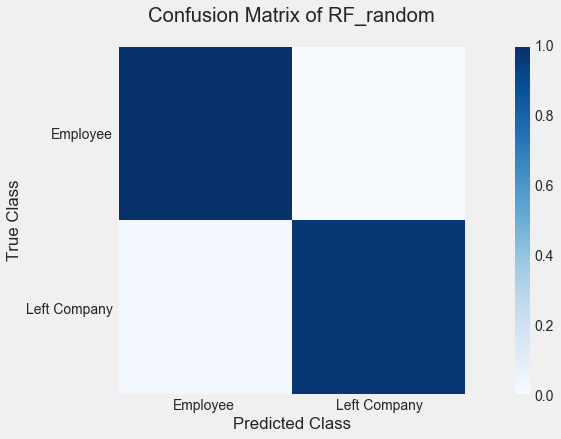

             precision    recall  f1-score   support

   Employee       0.99      1.00      0.99      3355
       Left       0.99      0.97      0.98      1152

avg / total       0.99      0.99      0.99      4507

True Positives: 1118
False Positives: 8
True Negatives: 3347
False Negatives: 34



In [75]:
scores_test_RF_random = evaluate_algos(classifier_RF_random, RFClassifier_RFE_train_features, Y_train, X_RF, y)
print_scores(scores_test_RF_random, "Tuned Random Forest (RFE) on Test Dataset (using Random Search)")

**Name: Tuned Random Forest (RFE) on Test Dataset (using Grid Search)**

Accuracy on Validation Dataset: 99.07%
Timing on Validation Dataset: 2.12s


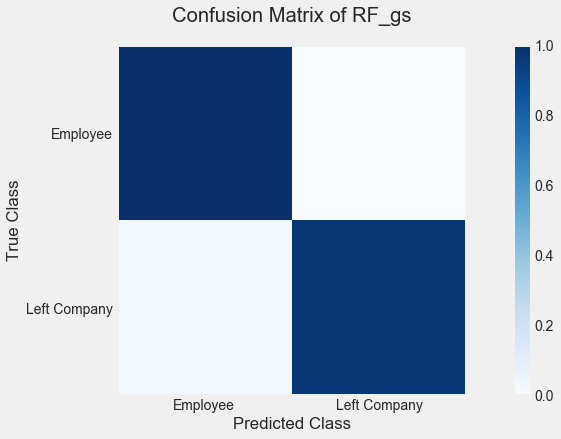

             precision    recall  f1-score   support

   Employee       0.99      1.00      0.99      3355
       Left       0.99      0.97      0.98      1152

avg / total       0.99      0.99      0.99      4507

True Positives: 1118
False Positives: 8
True Negatives: 3347
False Negatives: 34



In [76]:
scores_test_RF_gs = evaluate_algos(classifier_RF_gs, RFClassifier_RFE_train_features, Y_train, X_RF, y)
print_scores(scores_test_RF_gs, "Tuned Random Forest (RFE) on Test Dataset (using Grid Search)")

##### 7.7.4.3. Compare Base and Tuned Algorithm Performance

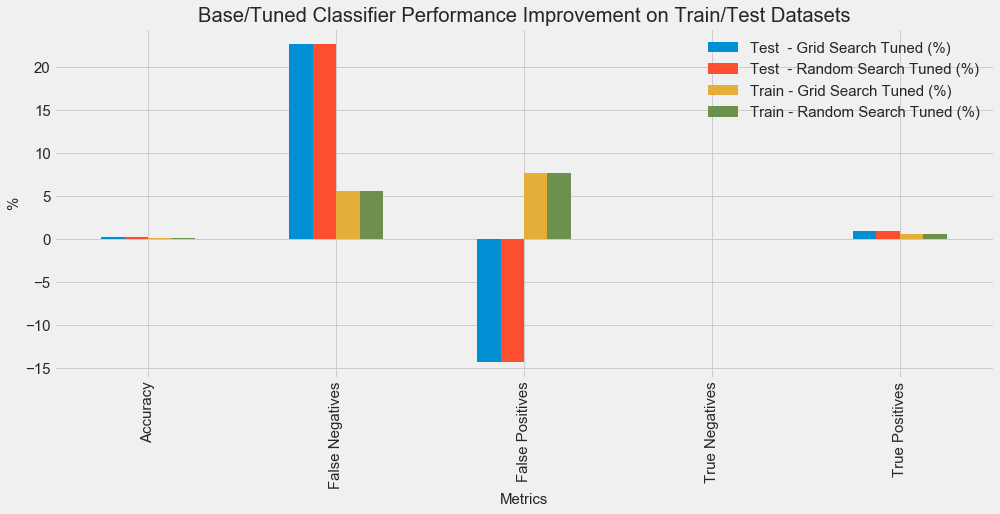

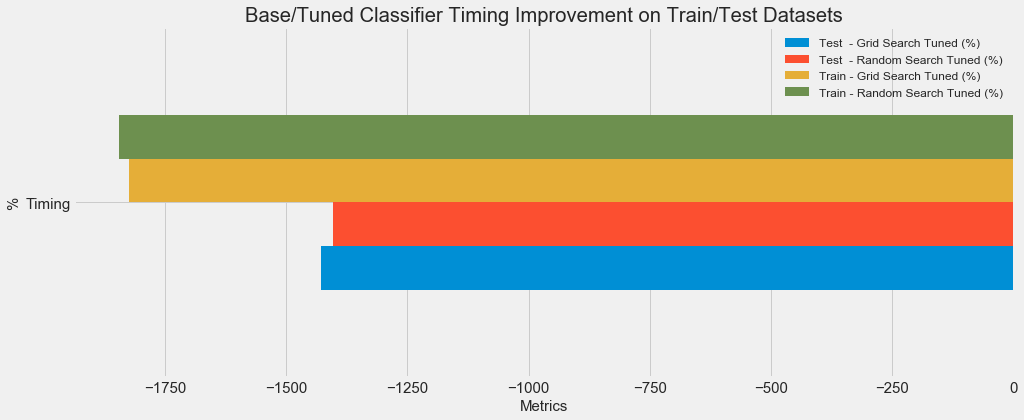

In [77]:
def AnalyzeTuningImprovement(scores): 
    ImprovedDicts = {}
    Improved_TimingDicts = {}
    
    for key in (scores):
        ImprovedDictVal = {}
        ImprovedDict_TimingVal = {}
        ImprovedDictVal["Accuracy"] = ((scores[key][1][0][2] - scores[key][0][0][2]) / scores[key][0][0][2]) * 100
        ImprovedDictVal["True Positives"] = ((scores[key][1][0][6] - scores[key][0][0][6]) / scores[key][0][0][6]) * 100
        ImprovedDictVal["False Positives"] = ((scores[key][0][0][7] - scores[key][1][0][7]) / scores[key][0][0][7]) * 100
        ImprovedDictVal["True Negatives"] = ((scores[key][1][0][8] - scores[key][0][0][8]) / scores[key][0][0][8]) * 100
        ImprovedDictVal["False Negatives"] = ((scores[key][0][0][9] - scores[key][1][0][9]) / scores[key][0][0][9]) * 100
        ImprovedDicts[key] = ImprovedDictVal
        
        ImprovedDict_TimingVal["Timing"] = ((scores[key][0][0][1] - scores[key][1][0][1]) / scores[key][0][0][1]) * 100
        Improved_TimingDicts[key] = ImprovedDict_TimingVal
    
    display(HTML(pd.DataFrame(ImprovedDicts).to_html()))
    
    ax = pd.DataFrame(ImprovedDicts).plot(kind='bar', title ="Base/Tuned Classifier Performance Improvement on Train/Test Datasets",legend=True, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.legend(fontsize=15)
    ax.set_xlabel("Metrics",fontsize=15)
    ax.set_ylabel("%",fontsize=15)
    
    display(HTML(pd.DataFrame(Improved_TimingDicts).to_html()))
    
    ax = pd.DataFrame(Improved_TimingDicts).plot(kind='barH', title ="Base/Tuned Classifier Timing Improvement on Train/Test Datasets",legend=True, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.legend(fontsize=12)    
    ax.set_xlabel("Metrics",fontsize=15)
    ax.set_ylabel("%",fontsize=15)

scores = {"Train - Random Search Tuned (%)" : (RFClassifier_scores_impt_features_RFE, RFClassifier_scores_impt_features_RFE_random),
          "Train - Grid Search Tuned (%)" : (RFClassifier_scores_impt_features_RFE, RFClassifier_scores_impt_features_RFE_gs),
          "Test  - Random Search Tuned (%)" : (scores_test_RF, scores_test_RF_random),
          "Test  - Grid Search Tuned (%)" : (scores_test_RF, scores_test_RF_gs)
         }

AnalyzeTuningImprovement(scores)

#### 7.7.5. Scores Comparison

##### 7.7.5.1. Train Dataset

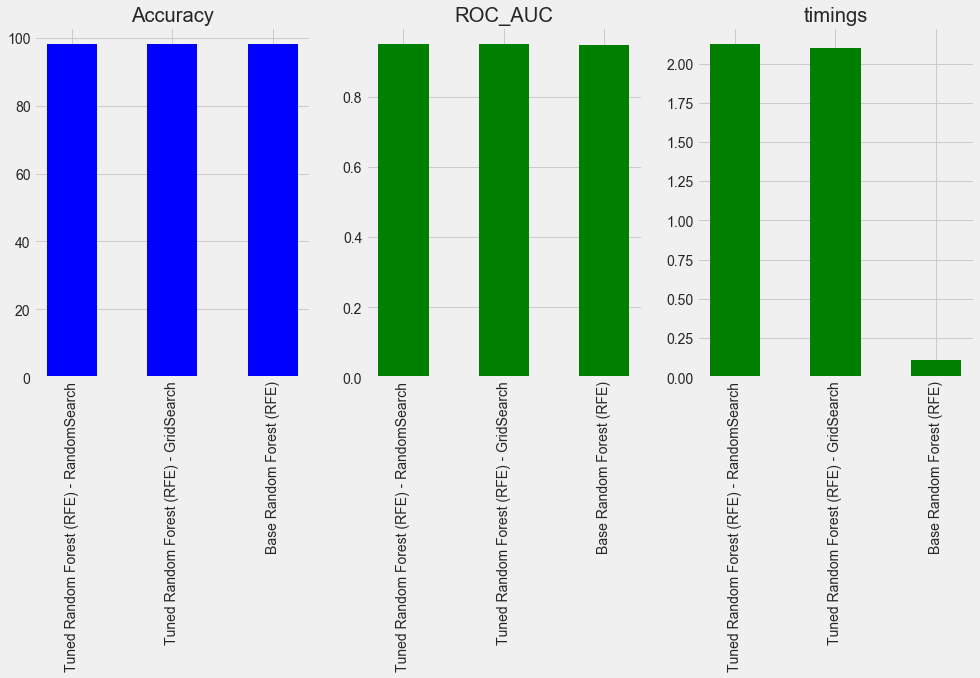

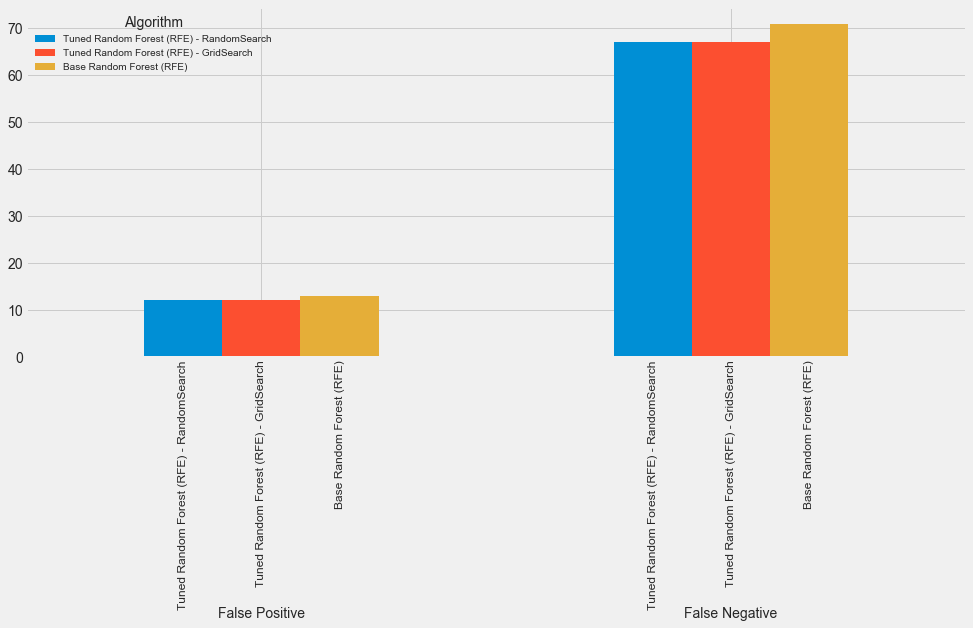

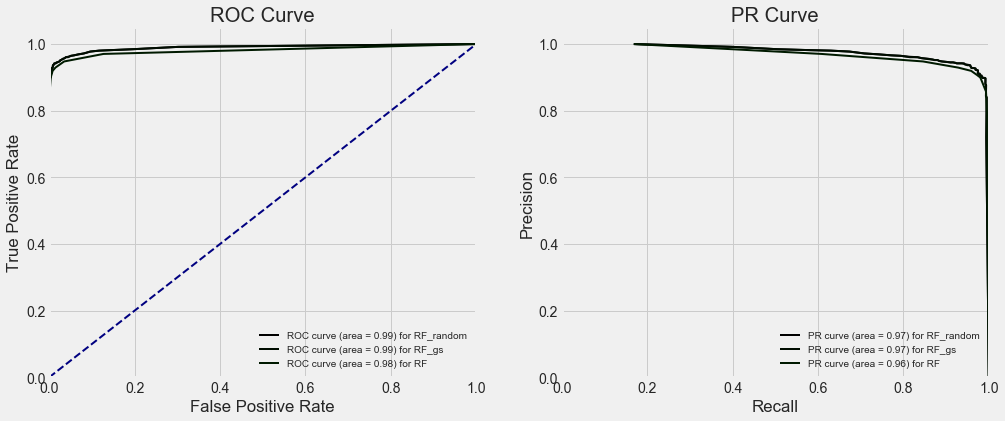

In [78]:
Scores_ = {"Base Random Forest (RFE)" : RFClassifier_scores_impt_features_RFE,
           "Tuned Random Forest (RFE) - RandomSearch" : RFClassifier_scores_impt_features_RFE_random,
           "Tuned Random Forest (RFE) - GridSearch" : RFClassifier_scores_impt_features_RFE_gs
          }
CompareScores(Scores_)

#### 7.7.5.2. Test Dataset

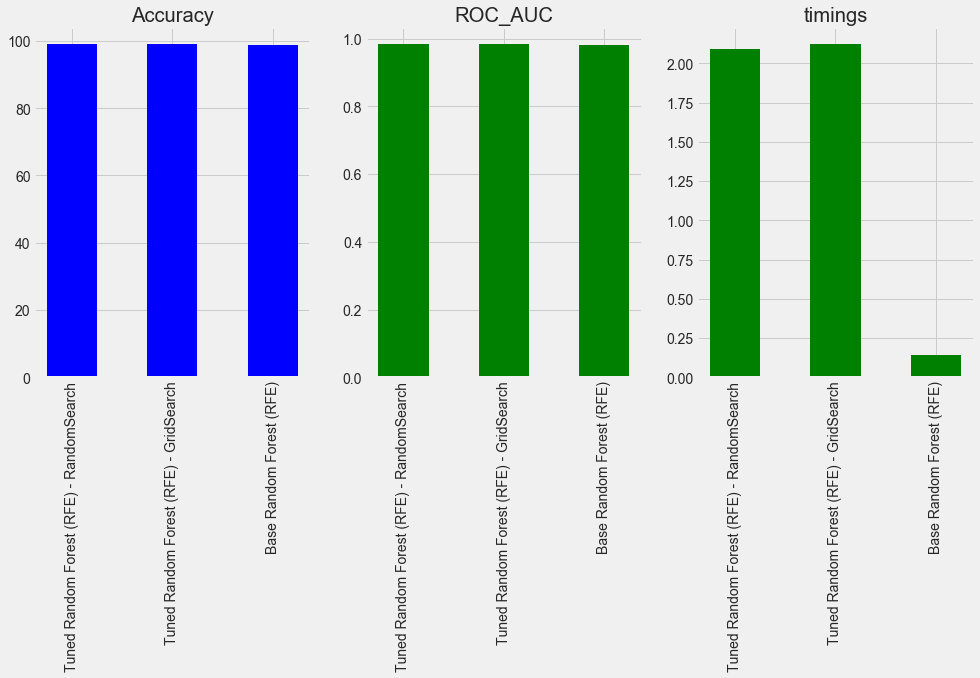

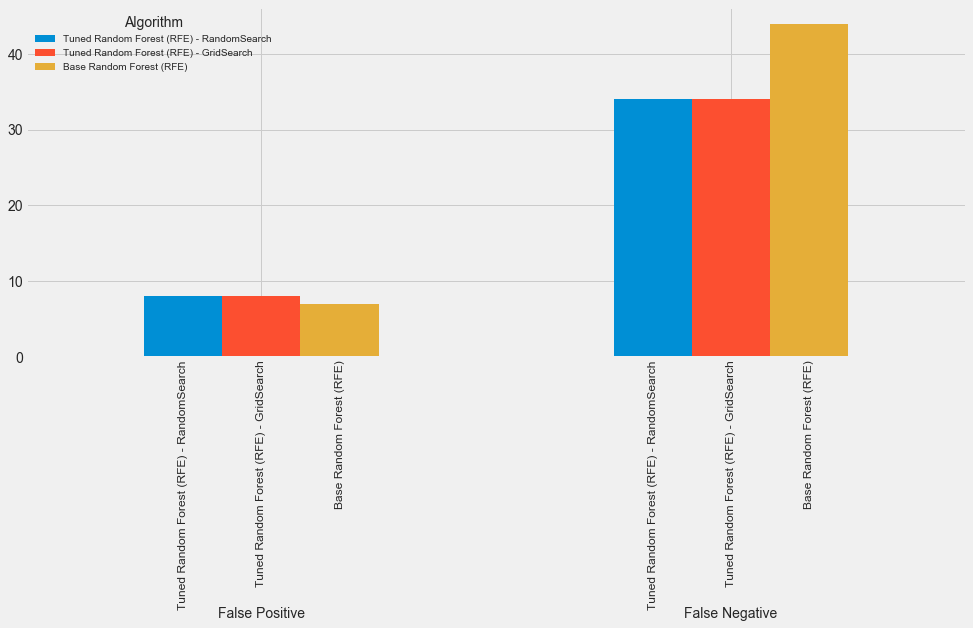

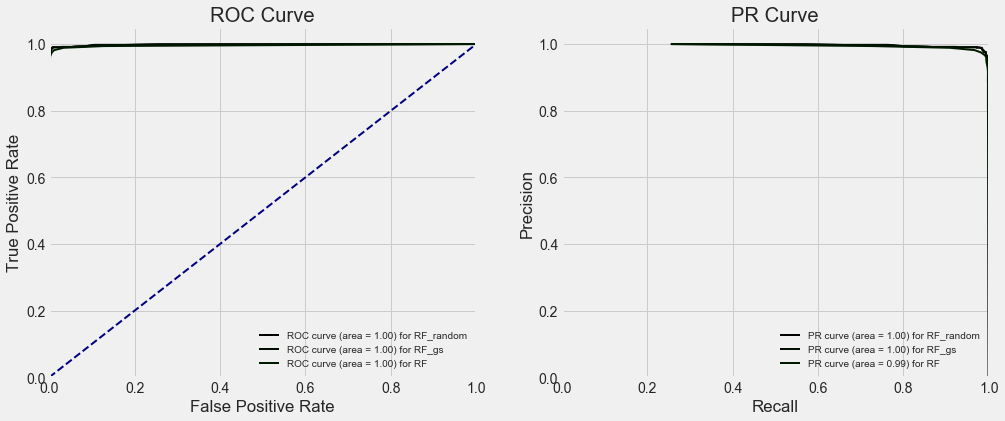

In [79]:
Scores_ = {"Base Random Forest (RFE)" : scores_test_RF,
           "Tuned Random Forest (RFE) - RandomSearch" : scores_test_RF_random,
           "Tuned Random Forest (RFE) - GridSearch" : scores_test_RF_gs
          }
CompareScores(Scores_)